----------
# Kaggle Pima Indian Diabetes Dataset
 https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database


 ***Don Shenal Munasinghe***

 
----------

- <a href='#1'>1. Introduction</a>  

    - <a href='#1.1'>1.1 Diabetes</a> 
    - <a href='#1.2'>1.2 Pima Indian Diabetes</a> 
    - <a href='#1.3'>1.3 Context</a> 
    - <a href='#1.4'>1.4 Acknowledgements</a> 
    - <a href='#1.5'>1.5 About this dataset</a> 
</br></br>
- <a href='#2'>2. Importing libraries</a> 
</br></br>
- <a href='#3'>3. Loading and cleaning the data</a>

	- <a href='#3.1'>3.1 Checking datatypes and presence of missing values</a>
	- <a href='#3.2'>3.2 Checking for duplicated rows</a>
	- <a href='#3.3'>3.3 Checking for zero values</a>
	- <a href='#3.4'>3.4 Checking for Outliers</a>
	- <a href='#3.5'>3.5 Imputing missing values</a>
</br></br>
- <a href='#4'>4. Modelling</a> 

	- <a href='#4.1'>4.1 Defining features X and target y and train-test-split</a>
	- <a href='#4.2'>4.2 Feature scaling</a>
	- <a href='#4.3'>4.3 Functions for evaluation</a>
	- <a href='#4.4'>4.4 Logistic regression</a>
	- <a href='#4.5'>4.5 XGBoost</a>
	- <a href='#4.6'>4.6 Decision Trees</a>
	- <a href='#4.7'>4.7 KNN</a>
	- <a href='#4.8'>4.8 Neural Networks</a>	
	- <a href='#4.9'>4.9 Lightgbm</a>
</br></br>
- <a href='#5'>5. Conclusion</a> 

# <a id='1'>1. Introduction</a> 

### <a id='1.1'>1.1 Diabetes</a>

Diabetes, a persistent health condition, disrupts the body's ability to convert food into energy. This process includes breaking down food into sugar and releasing it into the bloodstream, which is regulated by insulin. In diabetes, the body encounters either insufficient insulin production or becomes unresponsive to its effects, resulting in heightened blood sugar levels and potential health complications. There are three primary types of diabetes, each with distinct characteristics.

Type 1 diabetes stems from an autoimmune response that hampers insulin production, typically diagnosed in children and young adults.

Type 2 diabetes involves insulin resistance and is often diagnosed in adults, though it is increasingly prevalent among younger individuals.

Gestational diabetes occurs during pregnancy and may heighten the risk of health problems for both the mother and the baby. While diabetes has no cure, adopting a healthier lifestyle through weight management, nutritious eating, and physical activity can significantly enhance its control and prevention.

### <a id='1.2'>1.2 Pima Indian Diabetes</a> 

Diabetes within the Pima Indian community, which is notably widespread among the Pima Native American population in Arizona, is recognized by an exceptionally elevated occurrence of type 2 diabetes. Investigating this particular population provides valuable perspectives on the interplay of genetic and environmental factors in the development of the disease, offering broader implications for research and healthcare in the field of diabetes. Grasping the intricacies of this condition can significantly assist in the formulation of efficient healthcare protocols and preventative measures, rendering it a pivotal area of inquiry in the realm of medical research.

### <a id='1.3'>1.3 Context</a> 
This dataset originates from the National Institute of Diabetes and Digestive and Kidney Diseases and serves the purpose of predicting, through diagnostics, whether a patient is likely to have diabetes. This prediction is based on specific diagnostic measurements provided within the dataset. The selection of data instances for this dataset was subject to certain restrictions. Specifically, all individuals included in this dataset are female, aged at least 21 years, and of Pima Indian descent.

### <a id='1.4'>1.4 Acknowledgements</a> 
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

https://www.kaggle.com/code/amir9473/tuning-hyperparameters-ml-classification-acu-94

https://www.kaggle.com/code/vincentlugat/pima-indians-diabetes-eda-prediction-0-906


### <a id='1.5'>1.5 About this dataset</a> 
The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on. For the outcome class the value 1 is interpreted as "tested positive for diabetes".

|Column Name| Description|
|:------------|:------------|
|Pregnancies|Number of times pregnant|
|Glucose|Plasma glucose concentration a 2 hours in an oral glucose tolerance test|
|BloodPressure|Diastolic blood pressure (mm Hg)|
|SkinThickness|Triceps skin fold thickness (mm)|
|Insulin|2-Hour serum insulin (mu U/ml)|
|BMI|Body mass index (weight in kg/(height in m)^2)|
|DiabetesPedigreeFunction|  a function which scores likelihood of diabetes based on family history|
|Age| Age (years)|
|Outcome|0 (No diabetes) or 1 (diabetes) |

## <a id='2'>2. Importing libraries:</a>

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgbm

import optuna
import scipy.stats as ss
from scipy import interp
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform 

import tensorflow as tf
from tensorflow.keras.utils import plot_model
import keras 
from keras.models import Sequential 
from keras.layers import Dense, Activation, Dropout      

from sklearn import set_config
set_config(transform_output="pandas")
import joblib

# Set random seed 
rs = 42

warnings.filterwarnings("ignore")

## <a id='3'>3. Loading and cleaning the data</a>

In [2]:
df = pd.read_csv("data/diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### <a id='3.1'>3.1 Checking datatypes and presence of missing values</a>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


All datatypes are valid for modelling (only numerical data) and there are no NaN(missing)-values

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### <a id='3.2'>3.2 Checking for duplicated rows</a>

In [6]:
df.duplicated().value_counts()

False    768
Name: count, dtype: int64

No duplicated rows

### <a id='3.3'>3.3 Checking for zero values</a>

In [4]:
print((df == 0).sum())

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


For glucose, blood pressure, skin thickness, insulin and BMI the values cannot be zero,
they will be replaced with NaN values for now:

This will be done with a copy of the original dataframe df:

In [5]:
df_2 = df.copy()


In [6]:

df_2[['Glucose','BloodPressure','SkinThickness',
      'Insulin','BMI']] = df_2[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)


Checking if it worked:

In [7]:
print((df_2 == 0).sum())

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [8]:
df_2.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Yes, the NaN imputing worked, zero values from desired columns are now NaN values.

Now it can be checked if there are rows that contain more than 70% NaN values. 
If they do, they will be deleted to avoid potential errors.


In [9]:
df_2=df_2.dropna(thresh=0.7*len(df_2.columns))  

Comparing initial dataframe and the new dataframe:

Initial dataframe df:

In [10]:
df.shape

(768, 9)

New modified dataframe df_2:

In [11]:
df_2.shape

(733, 9)

The difference means that 35 rows of df_2 contained more than 70% NaN values and were deleted.

### <a id='3.4'>3.4 Checking for outliers</a>

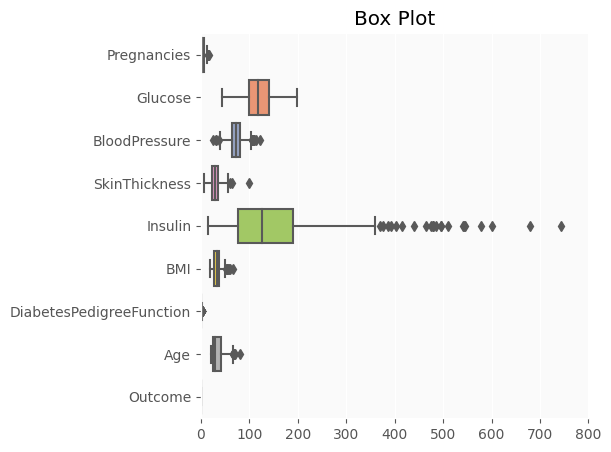

In [16]:

plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(5, 5))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 800))
plt.title("Box Plot")
ax = sns.boxplot(data = df_2, 
  orient = 'h', 
  palette = 'Set2')

Outliers are present, especially for Insulin column.
Identifying Outliers with IQR (Interquartile Range) method:

Calculating the range:

In [12]:
Q1  = pd.DataFrame()
Q3  =   pd.DataFrame()
IQR =  pd.DataFrame()
UpperLimit =  pd.DataFrame()
LowerLimit =  pd.DataFrame()
Outlier_UpperLimit =  pd.DataFrame(index=[1,2,3,4])
Outlier_LowerLimit =  pd.DataFrame(index=[1,2,3,4])

columns = df_2.columns[0:-1]

for i in columns:
    Q1[i] = [df_2[i].quantile(0.25)]
    Q3[i]=  [df_2[i].quantile(0.75)]
    IQR[i] = [Q3[i][0]-Q1[i][0]]
    UpperLimit[i] = [Q3[i][0]+1.5*IQR[i][0]]
    LowerLimit[i] = [Q1[i][0]-1.5*IQR[i][0]]

In [13]:
df_new = pd.concat([Q1,Q3,IQR,UpperLimit,LowerLimit])
df_new.index = ["Q1","Q3","IQR","UpperLimit","LowerLimit"]
dft = df_new.T
dft

,Q1,Q3,IQR,UpperLimit,LowerLimit
Pregnancies,1.000,6.000,5.000,13.500,-6.500
Glucose,99.750,141.250,41.500,203.500,37.500
BloodPressure,64.000,80.000,16.000,104.000,40.000
SkinThickness,22.000,36.000,14.000,57.000,1.000
Insulin,76.250,190.000,113.750,360.625,-94.375
BMI,27.500,36.600,9.100,50.250,13.850
DiabetesPedigreeFunction,0.245,0.629,0.384,1.205,-0.331
Age,24.000,41.000,17.000,66.500,-1.500


In [14]:
aa =[]
print("Upper Limit Outlier: ","\n")
for i in columns:
    aa = np.array(df_2[df_2[i]>dft["UpperLimit"][i]][i])
        
    print("{} Outliers: {}".format(i,aa))


Upper Limit Outlier:  

Pregnancies Outliers: [15 17 14 14]
Glucose Outliers: []
BloodPressure Outliers: [110. 108. 122. 110. 108. 110. 106. 106. 106. 114.]
SkinThickness Outliers: [60. 63. 99.]
Insulin Outliers: [543. 846. 495. 485. 495. 478. 744. 370. 680. 402. 375. 545. 465. 415.
 579. 474. 480. 600. 440. 540. 480. 387. 392. 510.]
BMI Outliers: [53.2 55.  67.1 52.3 52.9 59.4 57.3]
DiabetesPedigreeFunction Outliers: [2.288 1.441 1.39  1.893 1.781 1.222 1.4   1.321 1.224 2.329 1.318 1.213
 1.353 1.224 1.391 1.476 2.137 1.731 1.268 1.6   2.42  1.251 1.699 1.258
 1.282 1.698 1.461 1.292 1.394]
Age Outliers: [69 67 81 67 67 70 68]


In [15]:
xx =[]
print("Lower Limit Outlier: ","\n")

for i in columns:
    xx = np.array(df_2[df_2[i]<dft["LowerLimit"][i]][i])
    
    print("{} Outliers: {}".format(i,xx))


Lower Limit Outlier:  

Pregnancies Outliers: []
Glucose Outliers: []
BloodPressure Outliers: [30. 30. 24. 38.]
SkinThickness Outliers: []
Insulin Outliers: []
BMI Outliers: []
DiabetesPedigreeFunction Outliers: []
Age Outliers: []


Capping the Outliers:

Considering the limited size of the dataset, it is better to utilize data capping as an alternative to removing outlier data. This technique entails replacing data points exceeding the upper threshold with that specified value and data points falling below the lower threshold with the designated value.

In [21]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 733 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               733 non-null    int64  
 1   Glucose                   728 non-null    float64
 2   BloodPressure             731 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       731 non-null    float64
 6   DiabetesPedigreeFunction  733 non-null    float64
 7   Age                       733 non-null    int64  
 8   Outcome                   733 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 57.3 KB


In [16]:
# Making a list with the 7 columns that contain outliers, which will be capped
columns_cap = ["Insulin","SkinThickness","DiabetesPedigreeFunction","Pregnancies","BloodPressure","BMI","Age"]

# Function that loops through the columns in a dataframe and replaces values higher than the upper limit with the upper limit value and values lower
# than the lower limit with the lower limit value
def Cap_Outliers(dff,column):
    for i in column:
        dff[i] = np.where(dff[i]>dft["UpperLimit"][i],dft["UpperLimit"][i],
                            np.where(dff[i]<dft["LowerLimit"][i],dft["LowerLimit"][i],dff[i]))
    return dff

# Using function with df_2 dataframe and columns_cap list of 7 columns
Cap_Outliers(df_2,columns_cap) 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.205,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47.0,1


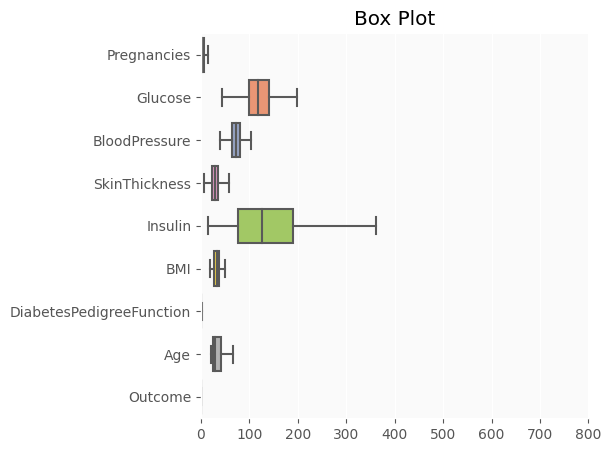

In [17]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(5, 5))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 800))
plt.title("Box Plot")
ax = sns.boxplot(data = df_2, 
  orient = 'h', 
  palette = 'Set2')

### <a id='3.5'>3.5 Imputing missing values</a>

Next, the remaining NaN values will be imputed with the mean (if normally distributed) or the median (if skewed).


Checking which columns still contain NaN values:

In [18]:
df_2.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                 2
SkinThickness               192
Insulin                     339
BMI                           2
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

The 5 columns Glucose, BloodPressure, SkinThickness, Insulin and BMI still contain NaN values, mainly SkinThickness and Insulin. 

### Checking distributions of data:

Histogram plots:

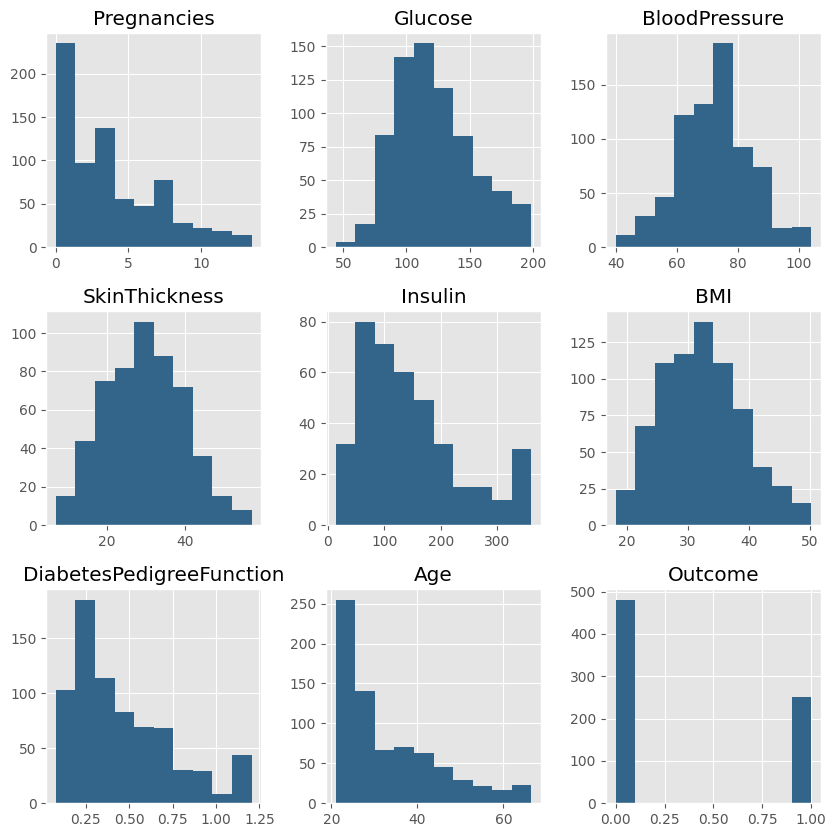

In [25]:
plot = df_2.hist(figsize = (10,10), color='#33658A') 

Version 2 of histograms with improved layout:

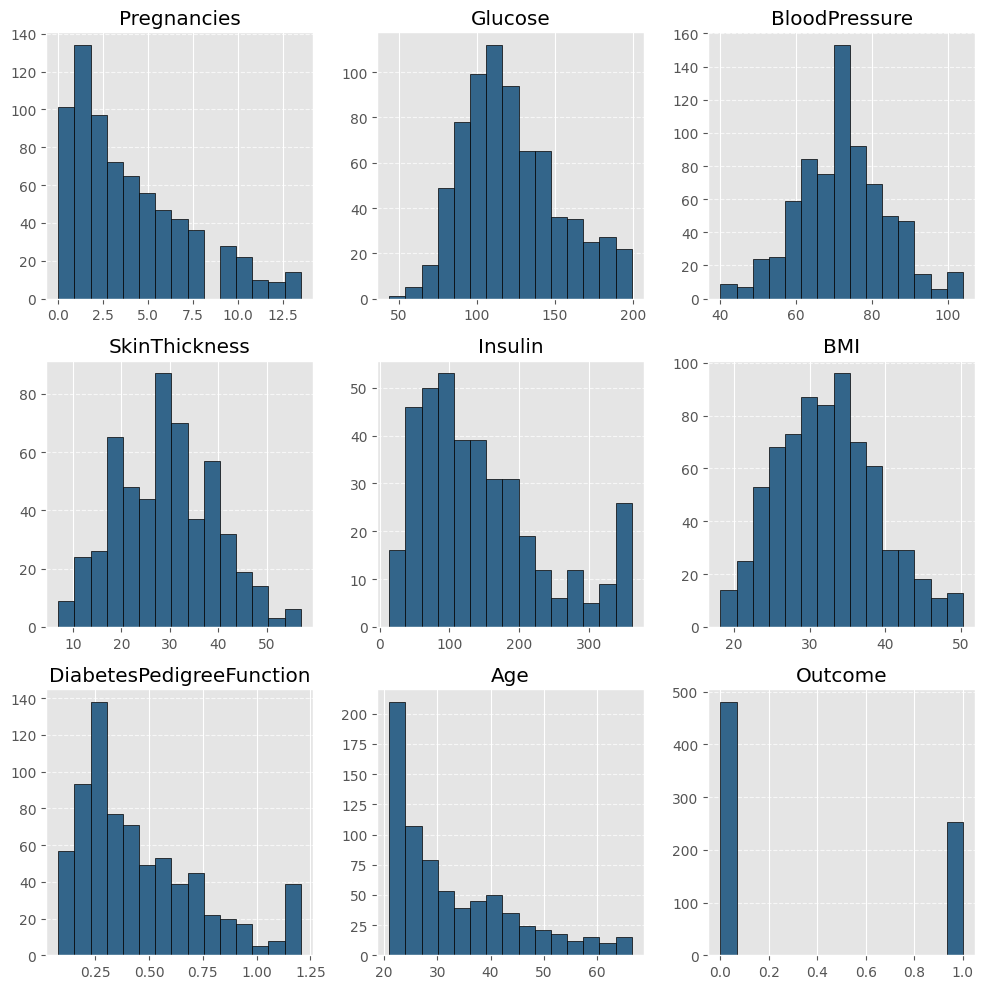

In [26]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through the columns and create histograms with custom styling and grids
for i, (column, ax) in enumerate(zip(df_2.columns, axes)):
    df_2[column].plot.hist(ax=ax, color='#33658A', bins=15, edgecolor='black')
    ax.set_title(column)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Version 3 with seaborn and included density lines (kde=True) and without 'Outcome' for a 2 rows and 4 cols layout:

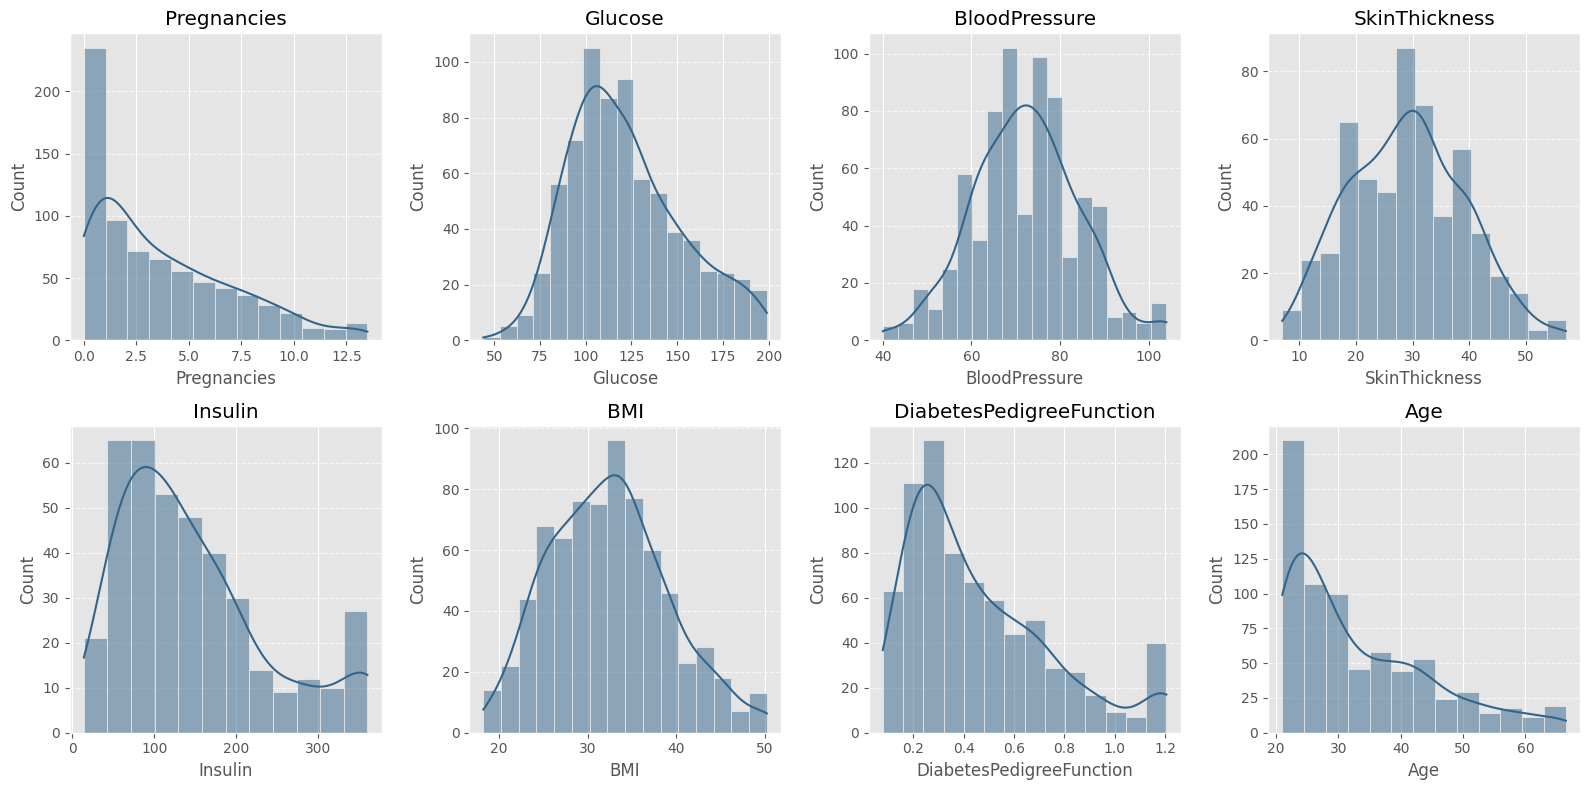

In [27]:
# List of columns for plotting
columns_to_plot = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through the columns and create histograms
for i, column in enumerate(columns_to_plot):
    sns.histplot(df_2[column], kde=True, ax=axes[i], color='#33658A',stat="count")
    axes[i].set_title(column)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

The columns that contain NaN values are Glucose, BloodPressure, SkinThickness, Insulin and BMI.

The histograms show that 'SkinThickness', 'BMI' and 'BloodPressure' are pretty normally distributed and the missing values can be imputed with the mean (also with the describe function it can be seen that the mean and the median are almost identical for these features).

'Insulin' and 'Glucose' are skewed and the missing values should be imputed with the median (with the describe function it can the seen that the mean is bigger than the median for these two features).
 

In [29]:
df_2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,733.000000,728.000000,731.000000,541.000000,394.000000,731.000000,733.000000,733.000000,733.000000
mean,3.849932,121.811813,72.329685,29.059150,146.500000,32.413064,0.463119,33.255798,0.343793
std,3.345434,30.702845,11.952276,10.057253,90.348842,6.672379,0.287294,11.644482,0.475297
min,0.000000,44.000000,40.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,22.000000,76.250000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.400000,0.380000,29.000000,0.000000
75%,6.000000,141.250000,80.000000,36.000000,190.000000,36.600000,0.629000,41.000000,1.000000
max,13.500000,199.000000,104.000000,57.000000,360.625000,50.250000,1.205000,66.500000,1.000000


In [19]:
glucose_median = df_2['Glucose'].median()
df_2['Glucose'].fillna(glucose_median, inplace=True)

insulin_median = df_2['Insulin'].median()
df_2['Insulin'].fillna(insulin_median, inplace=True)

Imputing function for the mean:

In [20]:
def fill_missing_with_mean(df, column_name):
    column_mean = df[column_name].mean()
    df[column_name].fillna(column_mean, inplace=True) 

# List of columns you want to fill with the mean
columns_to_fill = ['SkinThickness', 'BloodPressure', 'BMI']

# Loop through the columns and fill missing values with the mean
for column in columns_to_fill:
    fill_missing_with_mean(df_2, column) 


Checking if it worked:

In [21]:
df_2.isnull().sum()   

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Looks like it worked, there are no missing values anymore.

Checking histograms again after filling missing values:

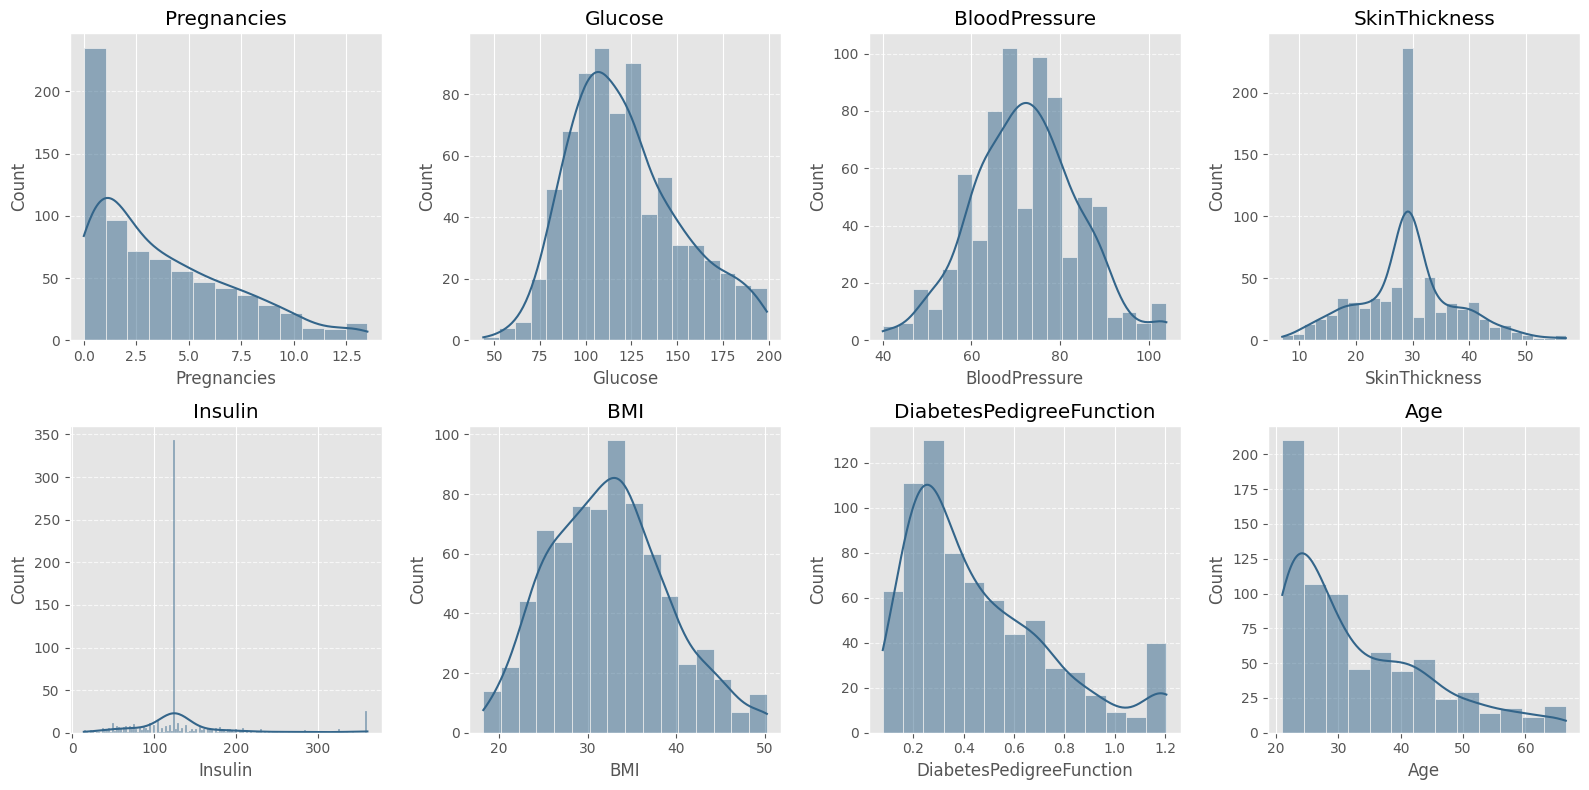

In [22]:
# List of columns for plotting
columns_to_plot = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through the columns and create histograms
for i, column in enumerate(columns_to_plot):
    sns.histplot(df_2[column], kde=True, ax=axes[i], color='#33658A',stat="count")
    axes[i].set_title(column)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [23]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 733 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               733 non-null    float64
 1   Glucose                   733 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             733 non-null    float64
 4   Insulin                   733 non-null    float64
 5   BMI                       733 non-null    float64
 6   DiabetesPedigreeFunction  733 non-null    float64
 7   Age                       733 non-null    float64
 8   Outcome                   733 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 57.3 KB


Saving cleaned dataframe as a csv file:

In [24]:
df_2.to_csv('cleaned_data.csv')

Correlation heatmap:

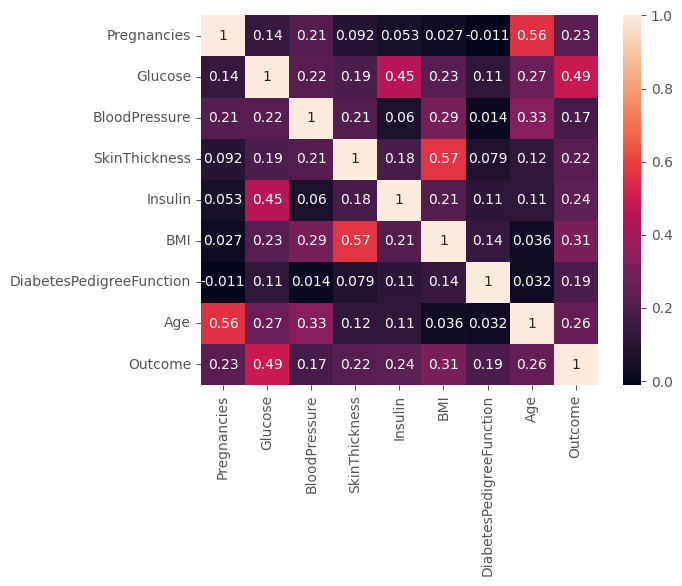

In [34]:
ax = sns.heatmap(df_2.corr(), annot = True)

No strong correlations

## <a id='4'> 4. Modelling</a>

### <a id='4.1'>4.1 Defining features X and target y and train-test-split</a>

In [25]:
# Defining X and y
X = df_2.drop('Outcome', axis=1)
y = df_2['Outcome']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y, shuffle=True)

# Making df_train and df_test dataframes:
#df_train = pd.concat([X_train,y_train], axis=1)
#df_test = pd.concat([X_test,y_test], axis=1)

# Check the shape of the data sets
print("X_train:", X_train.shape)  
print("y_train:", y_train.shape)   
print("X_test:", X_test.shape)  
print("y_test:", y_test.shape) 

X_train: (513, 8)
y_train: (513,)
X_test: (220, 8)
y_test: (220,)


### <a id='4.2'>4.2 Feature scaling</a>

In [26]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_ = scaler.transform(X_train)
X_test_ = scaler.transform(X_test)

### <a id='4.3'>4.3 Functions for evaluation</a>

In [27]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


def evaluate_classification_model(y_train, y_test, y_pred_train, y_pred_test):
    # Print accuracy of our model for train and test set
    print("Accuracy on train set:", round(accuracy_score(y_train, y_pred_train), 2))
    print("Accuracy on test set:", round(accuracy_score(y_test, y_pred_test), 2))
    print("--------" * 10)

    # Print classification report of our model for train data
    print("Classification for train data:")
    print(classification_report(y_train, y_pred_train))
    print("--------" * 10)

    # Print classification report of our model for test data
    print("Classification for test data:")
    print(classification_report(y_test, y_pred_test))
    print("--------" * 10)

    # Evaluate the model with a confusion matrix
    cm = confusion_matrix(y_test, y_pred_test)

    # Print confusion matrix
    sns.heatmap(cm, annot=True, cmap='YlGn',
                yticklabels=['Actual negative', 'Actual positive'],
                xticklabels=['neg_pred', 'pos_pred'])

Function for ROC curves and ROC AUC scores:

A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the performance of a binary classifier model at varying threshold values.

The ROC curve is the plot of the true positive rate (TPR) against the false positive rate (FPR) at each threshold setting. 

AUC stands for Area Under the Curve.

• Random classifier: 

→ ROC AUC is 0.5

→ ROC curve is on the 45° line

• Perfect classifier:

→ ROC AUC is 1

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score

def evaluate_classification_model_with_roc(y_train, y_test, y_pred_train_prob, y_pred_test_prob):
    # # Print accuracy of our model for train and test set
    # print("Accuracy on train set:", round(accuracy_score(y_train, y_pred_train_prob >= 0.5), 2))
    # print("Accuracy on test set:", round(accuracy_score(y_test, y_pred_test_prob >= 0.5), 2))
    # print("--------" * 10)

    # # Print classification report of our model for train data
    # print("Classification for train data:")
    # print(classification_report(y_train, y_pred_train_prob >= 0.5))
    # print("--------" * 10)

    # # Print classification report of our model for test data
    # print("Classification for test data:")
    # print(classification_report(y_test, y_pred_test_prob >= 0.5))
    # print("--------" * 10)

    # Evaluate the model with ROC curves and ROC AUC scores
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train_prob)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test_prob)
    roc_auc_train = roc_auc_score(y_train, y_pred_train_prob)
    roc_auc_test = roc_auc_score(y_test, y_pred_test_prob)

    # Plot ROC curves
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc_train:.2f})")
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Train)')
    plt.legend(loc="lower right")

    plt.subplot(122)
    plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc_test:.2f})")
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Test)')
    plt.legend(loc="lower right")

    plt.show()


### <a id='4.4'>4.4 Logistic regression</a>

In [39]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42, class_weight="balanced")
log_reg.fit(X_train, y_train)

y_pred_train = log_reg.predict(X_train) 
y_pred_test = log_reg.predict(X_test)


Accuracy on train set: 0.77
Accuracy on test set: 0.72
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       337
           1       0.65      0.73      0.69       176

    accuracy                           0.77       513
   macro avg       0.75      0.76      0.75       513
weighted avg       0.78      0.77      0.77       513

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       144
           1       0.59      0.67      0.63        76

    accuracy                           0.72       220
   macro avg       0.70      0.71      0.70       220
weighted avg       0.73      0.72      0.73       220

--------------------------------------------------------------------

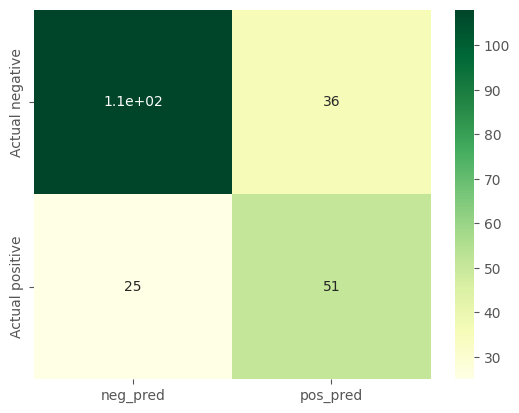

In [40]:
evaluate_classification_model(y_train, y_test, y_pred_train, y_pred_test)

Good accuracy and f1-scores, a better [1] recall would be nice though, which is an important value in this case (detecting all the diabetes cases and avoiding misidentifying a person with diabetes as healthy).

For ROC Curves the probabilities are necessary:

In [41]:
# For the training set
y_pred_train_prob = log_reg.predict_proba(X_train)[:, 1]  

# For the testing set 
y_pred_test_prob = log_reg.predict_proba(X_test)[:, 1] 

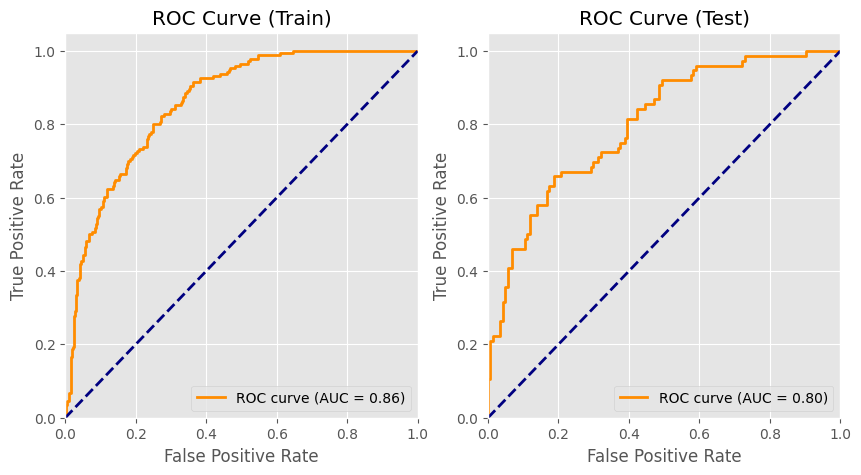

In [42]:
evaluate_classification_model_with_roc(y_train, y_test, y_pred_train_prob, y_pred_test_prob) 

Good ROC AUC values.

GridSearchCV hyperparameter optimization might improve the results.

### GridSearchCV hyperparameter optimization for logistic regression

Defining parameter grid:

In [43]:
param_logreg = {'penalty':('l1','l2'),
                'C': [0.001, 0.01, 0.1, 1, 10],
                'solver': ['liblinear', 'newton-cg', 'lbfgs','sag','saga'],
                'max_iter': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
                'class_weight': [None, 'balanced'],
                'random_state': [42]
               }

### With scoring = 'accuracy'

In [56]:
# Create GridSearchCV Object:
logreg_model = LogisticRegression()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=logreg_model, param_grid=param_logreg, 
                           scoring='accuracy', cv=5)

In [45]:
# Create another GridSearchCV object for scaled features
grid_search_ = GridSearchCV(estimator=logreg_model, param_grid=param_logreg, 
                           scoring='accuracy', cv=5)

In [57]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train) 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [100, 200, 300, 400, 500, 600, 700, 800,
                                      900, 1000],
                         'penalty': ('l1', 'l2'), 'random_state': [42],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']},
             scoring='accuracy')

With scaled features X_train_ :

In [47]:
# Fit the grid search to the data
grid_search_.fit(X_train_, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [100, 200, 300, 400, 500, 600, 700, 800,
                                      900, 1000],
                         'penalty': ('l1', 'l2'), 'random_state': [42],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']},
             scoring='accuracy')

In [58]:
# View the best parameters and best cross-validation score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'C': 1, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs'}
Best Cross-Validation Score: 0.7778793070626309


In [59]:
# View the best parameters and best cross-validation score for grid search with scaled features
print("Best Parameters:", grid_search_.best_params_)
print("Best Cross-Validation Score:", grid_search_.best_score_)

Best Parameters: {'C': 0.01, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'random_state': 42, 'solver': 'newton-cg'}
Best Cross-Validation Score: 0.777765086617171


In [60]:
# Save best estimator (including fitted preprocessing steps) as best_model 
best_model_logreg_1 = grid_search.best_estimator_

In [61]:
# Save best estimator (including fitted preprocessing steps) as best_model_ for grid search with scaled features 
best_model_logreg_2_scaled = grid_search_.best_estimator_

In [62]:
# Calculating the accuracy, recall and precision for the train and test set with the optimized model

y_pred_train = best_model_logreg_1.predict(X_train) 

y_pred_test= best_model_logreg_1.predict(X_test)

In [63]:
# Calculating the accuracy, recall and precision for the train and test set with the optimized model with scaled features

y_pred_train_ = best_model_logreg_2_scaled .predict(X_train_) 

y_pred_test_= best_model_logreg_2_scaled .predict(X_test_)

Accuracy on train set: 0.79
Accuracy on test set: 0.75
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       337
           1       0.73      0.62      0.67       176

    accuracy                           0.79       513
   macro avg       0.77      0.75      0.76       513
weighted avg       0.78      0.79      0.78       513

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       144
           1       0.71      0.49      0.58        76

    accuracy                           0.75       220
   macro avg       0.74      0.69      0.70       220
weighted avg       0.75      0.75      0.74       220

--------------------------------------------------------------------

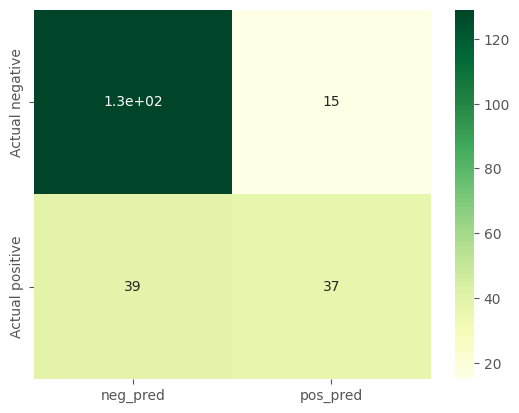

In [64]:
evaluate_classification_model(y_train, y_test, y_pred_train, y_pred_test)

Accuracy on train set: 0.78
Accuracy on test set: 0.75
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       337
           1       0.78      0.49      0.60       176

    accuracy                           0.78       513
   macro avg       0.78      0.71      0.72       513
weighted avg       0.78      0.78      0.76       513

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

           0       0.74      0.93      0.83       144
           1       0.75      0.39      0.52        76

    accuracy                           0.75       220
   macro avg       0.75      0.66      0.67       220
weighted avg       0.75      0.75      0.72       220

--------------------------------------------------------------------

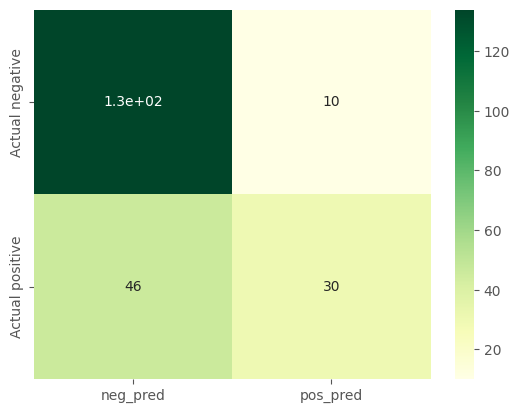

In [65]:
evaluate_classification_model(y_train, y_test, y_pred_train_, y_pred_test_)  #with scaled features

### ROC Curves:

In [66]:
# For the training set
y_pred_train_prob = best_model_logreg_1.predict_proba(X_train)[:, 1]  

# For the testing set
y_pred_test_prob = best_model_logreg_1.predict_proba(X_test)[:, 1] 

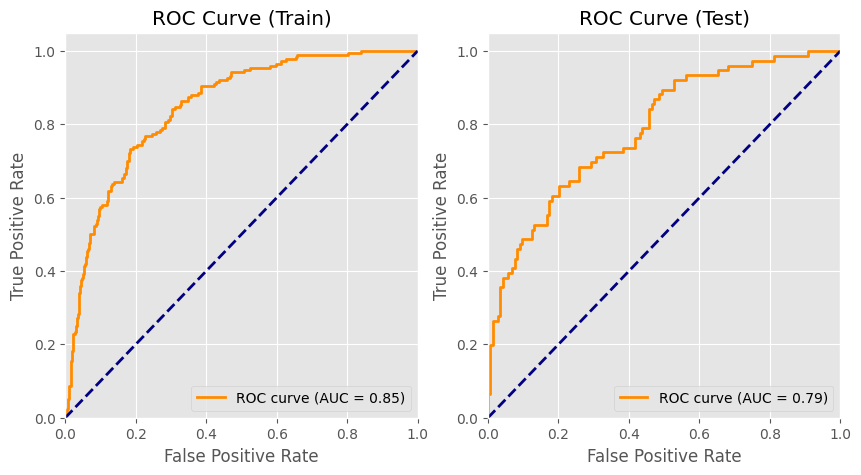

In [67]:
evaluate_classification_model_with_roc(y_train, y_test, y_pred_train_prob, y_pred_test_prob) 

With scaled features:

In [68]:
# For the training set
y_pred_train_prob_ = best_model_logreg_2_scaled.predict_proba(X_train_)[:, 1] 

# For the testing set
y_pred_test_prob_ = best_model_logreg_2_scaled.predict_proba(X_test_)[:, 1]  

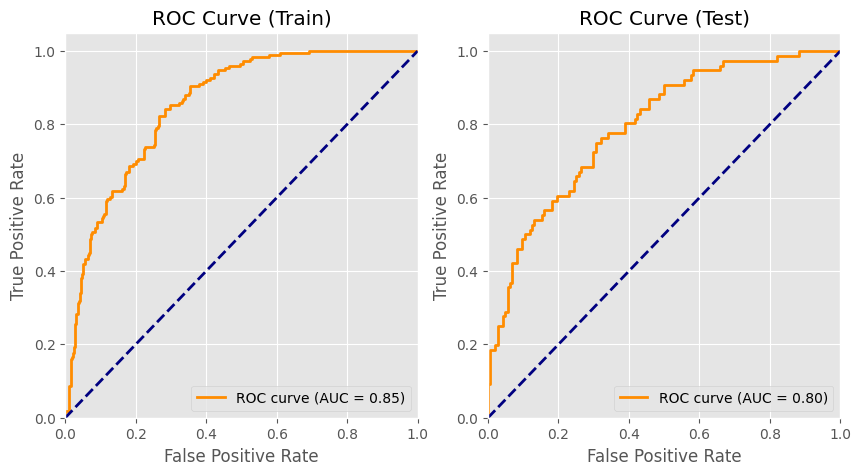

In [69]:
evaluate_classification_model_with_roc(y_train, y_test, y_pred_train_prob_, y_pred_test_prob_) 

Looks slghtly better with scaled features, but overall it looks worse than before without optimization, 
it was set to optimize the accuracy on train_data, which was indeed done, but it's only slightly higher
and with the downside of a significantly worse recall especially with the test data, which is an important value in this case.
Another try with optimizing for the f1-score :

### With scoring = 'f1' :

In [70]:
# Create GridSearchCV Object:
logreg_model = LogisticRegression() 

# Create the GridSearchCV object
grid_search_f1 = GridSearchCV(estimator=logreg_model, param_grid=param_logreg, 
                           scoring='f1', cv=5)

In [71]:
# Fit the grid search to the data
grid_search_f1.fit(X_train_, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [100, 200, 300, 400, 500, 600, 700, 800,
                                      900, 1000],
                         'penalty': ('l1', 'l2'), 'random_state': [42],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']},
             scoring='f1')

In [72]:
# View the best parameters and best cross-validation score
print("Best Parameters:", grid_search_f1.best_params_)
print("Best Cross-Validation Score:", grid_search_f1.best_score_)

Best Parameters: {'C': 1, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear'}
Best Cross-Validation Score: 0.6887969238163902


In [74]:
# Save best estimator (including fitted preprocessing steps) as best_model 
best_model_logreg_f1 = grid_search_f1.best_estimator_
best_model_logreg_f1

LogisticRegression(C=1, class_weight='balanced', random_state=42,
                   solver='liblinear')

In [75]:
y_pred_train = best_model_logreg_f1.predict(X_train_) 

y_pred_test= best_model_logreg_f1.predict(X_test_)

Accuracy on train set: 0.77
Accuracy on test set: 0.72
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

           0       0.84      0.79      0.82       337
           1       0.64      0.72      0.68       176

    accuracy                           0.77       513
   macro avg       0.74      0.76      0.75       513
weighted avg       0.77      0.77      0.77       513

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

           0       0.81      0.74      0.78       144
           1       0.58      0.67      0.62        76

    accuracy                           0.72       220
   macro avg       0.70      0.71      0.70       220
weighted avg       0.73      0.72      0.72       220

--------------------------------------------------------------------

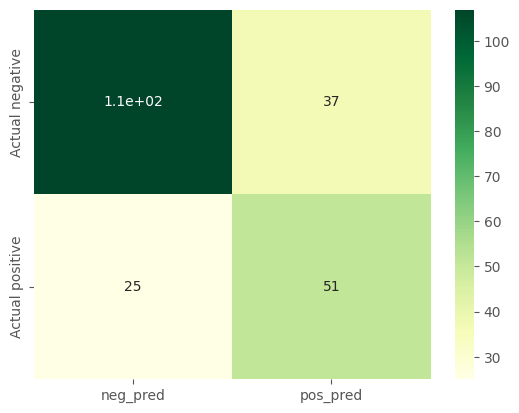

In [76]:
evaluate_classification_model(y_train, y_test, y_pred_train, y_pred_test)

In [77]:
# For the training set
y_pred_train_prob = best_model_logreg_f1.predict_proba(X_train_)[:, 1]  # Replace X_train with your training data

# For the testing set
y_pred_test_prob = best_model_logreg_f1.predict_proba(X_test_)[:, 1]  # Replace X_test with your testing data

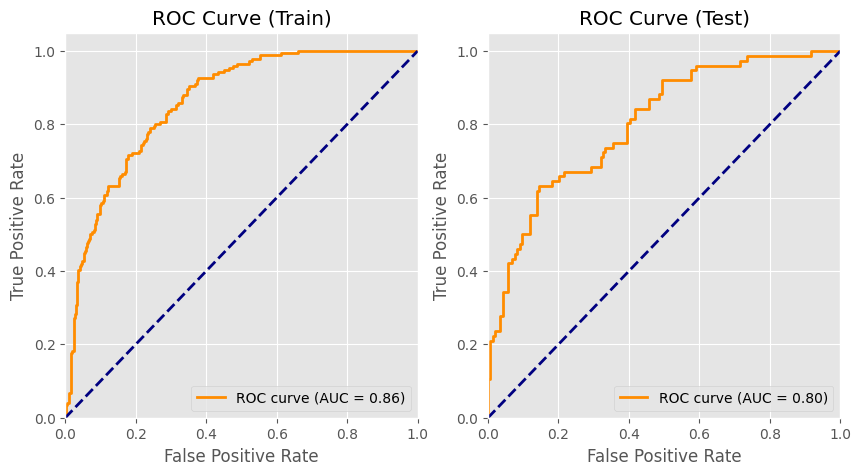

In [78]:
evaluate_classification_model_with_roc(y_train, y_test, y_pred_train_prob, y_pred_test_prob)

### Almost identical to the first logistic regression model before GridSearchCV

### With scoring = 'recall' :

In [79]:
# Create GridSearchCV Object:
logreg_model = LogisticRegression() 

# Create the GridSearchCV object
grid_search_recall = GridSearchCV(estimator=logreg_model, param_grid=param_logreg, 
                           scoring='recall', cv=5)

In [80]:
# Fit the grid search to the data
grid_search_recall.fit(X_train_, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [100, 200, 300, 400, 500, 600, 700, 800,
                                      900, 1000],
                         'penalty': ('l1', 'l2'), 'random_state': [42],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']},
             scoring='recall')

In [81]:
# View the best parameters and best cross-validation score
print("Best Parameters:", grid_search_recall.best_params_)
print("Best Cross-Validation Score:", grid_search_recall.best_score_)

Best Parameters: {'C': 0.001, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear'}
Best Cross-Validation Score: 0.8066666666666666


In [83]:
# Save best estimator (including fitted preprocessing steps) as best_model 
best_model_logreg_recall = grid_search_recall.best_estimator_
best_model_logreg_recall

LogisticRegression(C=0.001, class_weight='balanced', random_state=42,
                   solver='liblinear')

In [84]:
y_pred_train = best_model_logreg_recall.predict(X_train_) 

y_pred_test= best_model_logreg_recall.predict(X_test_)

Accuracy on train set: 0.75
Accuracy on test set: 0.7
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

           0       0.88      0.72      0.79       337
           1       0.60      0.81      0.69       176

    accuracy                           0.75       513
   macro avg       0.74      0.77      0.74       513
weighted avg       0.78      0.75      0.76       513

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

           0       0.83      0.67      0.74       144
           1       0.54      0.74      0.63        76

    accuracy                           0.70       220
   macro avg       0.69      0.71      0.68       220
weighted avg       0.73      0.70      0.70       220

---------------------------------------------------------------------

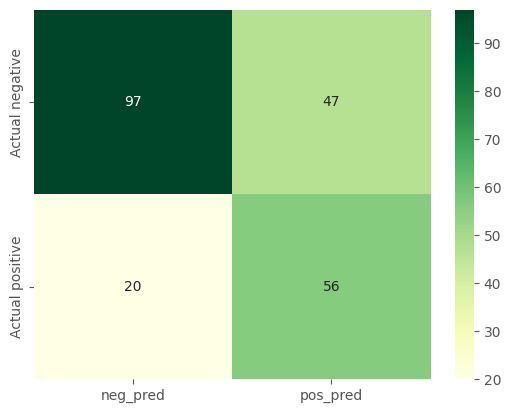

In [85]:
evaluate_classification_model(y_train, y_test, y_pred_train, y_pred_test) 

So far the best result with decent accuracy and [1] recall, but still room for improvement.

### Hyperparameter Optimization with Optuna:

Optuna is a versatile hyperparameter tuning library designed to work seamlessly with various machine learning and deep learning frameworks. It offers three key features for effective hyperparameter optimization:

1. Eager Search Spaces: Automates the search for optimal hyperparameters.
2. State-of-the-Art Algorithms: Efficiently explores extensive parameter spaces, pruning unproductive trials to deliver faster results.
3. Easy Parallelization: Facilitates hyperparameter search across multiple threads or processes without requiring code modification.

The overall process in Optuna differs from GridSearchCV and can be divided into three main components:

1. Defining the Objective Function: The core of Optuna's hyperparameter optimization is the objective function. While a brute-force grid   search seeks to minimize an objective function, it lacks the ability to consider the performance of different hyperparameter combinations.

2. Creating a Study Object: A study object is created to manage and oversee the optimization process.

3. Running the Optimization Process: This step initiates the optimization process.

Optuna provides an efficient way to optimize hyperparameter selections, taking into account the performance of various hyperparameter combinations

Optuna can be combined with K-fold cross-validation, which is a robust technique in the field of machine learning. It involves partitioning the dataset into subsets and training the model on k-1 of these folds while testing its performance on the remaining fold.

Repeated k-fold cross-validation takes this approach a step further by applying it iteratively. This repeated process helps reduce variance and ensures a robust evaluation of the model. It is particularly valuable for tasks such as model selection, hyperparameter optimization, and guarding against overfitting. Ultimately, repeated k-fold cross-validation provides dependable estimates of a model's ability to generalize to new data.

In [29]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
cv = RepeatedKFold(n_splits=10 , n_repeats=5, random_state=42)

In [30]:
import optuna 

With scoring = "f1":

In [31]:
# Creating an Objective Function

def objective_logreg(trial):
    
    # Define hyperparameters
    param_logr = {'C' : trial.suggest_float("C", 0.001, 10.0, log=True),
    'solver' : trial.suggest_categorical('solver',["newton-cg", "lbfgs", "liblinear", "sag", "saga"]),
    'max_iter' : trial.suggest_int("max_iter", 1, 10000)
    }

    # Create and train the model
    lr = LogisticRegression(**param_logr,random_state=42)
    lr.fit(X_train_, y_train)

    # Evaluate the model
    score = cross_val_score(lr, X_train_, y_train, cv=cv, scoring="f1").mean()

    return score

# Creating and running the optimization

study_lr = optuna.create_study(direction='maximize',study_name = "logr")
study_lr.optimize(objective_logreg, n_trials=300)

[I 2023-11-15 18:42:30,570] A new study created in memory with name: logr
[I 2023-11-15 18:42:31,169] Trial 0 finished with value: 0.6392236348151983 and parameters: {'C': 0.4691497420600329, 'solver': 'liblinear', 'max_iter': 8962}. Best is trial 0 with value: 0.6392236348151983.
[I 2023-11-15 18:42:31,839] Trial 1 finished with value: 0.6366112650589804 and parameters: {'C': 3.358473787962871, 'solver': 'lbfgs', 'max_iter': 292}. Best is trial 0 with value: 0.6392236348151983.
[I 2023-11-15 18:42:32,628] Trial 2 finished with value: 0.5623893165902171 and parameters: {'C': 0.008329778941016656, 'solver': 'newton-cg', 'max_iter': 8800}. Best is trial 0 with value: 0.6392236348151983.
[I 2023-11-15 18:42:33,225] Trial 3 finished with value: 0.6374573968648645 and parameters: {'C': 1.071859698121326, 'solver': 'lbfgs', 'max_iter': 8982}. Best is trial 0 with value: 0.6392236348151983.
[I 2023-11-15 18:42:33,843] Trial 4 finished with value: 0.6382481075773019 and parameters: {'C': 0.837

In [32]:
# Evaluating the Optuna Trial
print("Best trial:", study_lr.best_trial.number)
print("Best F1 score:", study_lr.best_trial.value)
print("Best hyperparameters:", study_lr.best_params) 

Best trial: 92
Best F1 score: 0.6455974150803648
Best hyperparameters: {'C': 0.1885218898212008, 'solver': 'liblinear', 'max_iter': 5343}


In [33]:
best_param_optuna = study_lr.best_params

In [34]:
optuna_model = LogisticRegression(**best_param_optuna).fit(X_train_,y_train)
y_pred_train_optuna = optuna_model.predict(X_train_)
y_pred_test_optuna = optuna_model.predict(X_test_)

Accuracy on train set: 0.79
Accuracy on test set: 0.76
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       337
           1       0.74      0.61      0.67       176

    accuracy                           0.79       513
   macro avg       0.78      0.75      0.76       513
weighted avg       0.79      0.79      0.79       513

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       144
           1       0.70      0.53      0.60        76

    accuracy                           0.76       220
   macro avg       0.74      0.70      0.71       220
weighted avg       0.75      0.76      0.75       220

--------------------------------------------------------------------

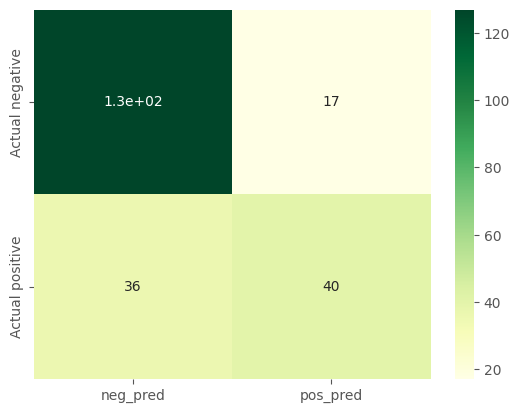

In [35]:
evaluate_classification_model(y_train, y_test, y_pred_train_optuna, y_pred_test_optuna)

Good accuracy and precision and great ngeative [0] recall, but unfortunately poor positive [1] recall, which is an important metric.

In [36]:

y_pred_train_prob_optuna = optuna_model.predict_proba(X_train_)[:, 1]  


y_pred_test_prob_optuna = optuna_model.predict_proba(X_test_)[:, 1]

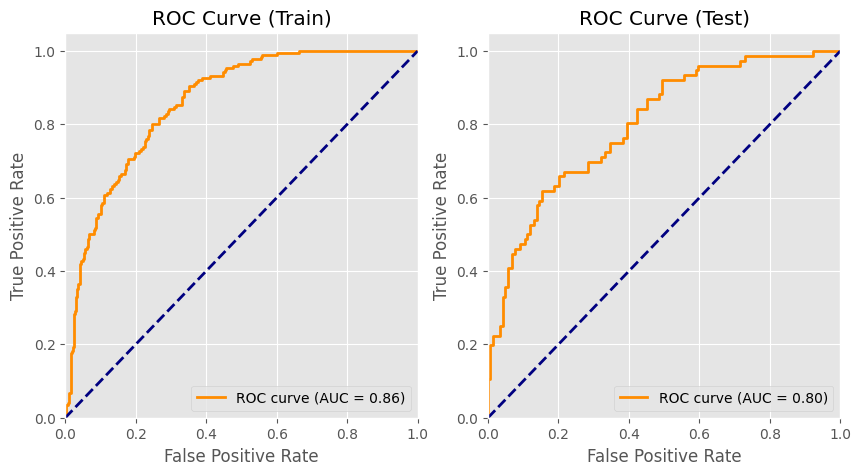

In [37]:
evaluate_classification_model_with_roc(y_train, y_test, y_pred_train_prob_optuna, y_pred_test_prob_optuna)

With scoring = 'recall':

In [38]:
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score

# Define a custom objective function to maximize 1 - recall (to make it suitable for maximization)
def objective_logreg(trial):
    # Define hyperparameters
    param_logr = {
        'C': trial.suggest_float("C", 0.001, 10.0, log=True),
        'solver': trial.suggest_categorical('solver', ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]),
        'max_iter': trial.suggest_int("max_iter", 1, 10000)
    }

    # Create and train the model
    lr = LogisticRegression(**param_logr, random_state=42)
    lr.fit(X_train_, y_train)

    # Evaluate the model with recall as the scoring metric
    recall = cross_val_score(lr, X_train_, y_train, cv=cv, scoring='recall').mean()

    return recall  

# Creating and running the optimization
study_lr_recall = optuna.create_study(direction='maximize', study_name="logr_recall")
study_lr_recall.optimize(objective_logreg, n_trials=300) 


[I 2023-11-15 18:57:36,301] A new study created in memory with name: logr_recall
[I 2023-11-15 18:57:37,134] Trial 0 finished with value: 0.5890150987219905 and parameters: {'C': 0.7811842053072857, 'solver': 'liblinear', 'max_iter': 1068}. Best is trial 0 with value: 0.5890150987219905.
[I 2023-11-15 18:57:38,712] Trial 1 finished with value: 0.5835896937774041 and parameters: {'C': 2.9960805222102542, 'solver': 'newton-cg', 'max_iter': 1991}. Best is trial 0 with value: 0.5890150987219905.
[I 2023-11-15 18:57:39,925] Trial 2 finished with value: 0.5835896937774041 and parameters: {'C': 2.5680028172555636, 'solver': 'sag', 'max_iter': 9760}. Best is trial 0 with value: 0.5890150987219905.
[I 2023-11-15 18:57:40,795] Trial 3 finished with value: 0.3450525852952828 and parameters: {'C': 0.004592000795125858, 'solver': 'saga', 'max_iter': 7370}. Best is trial 0 with value: 0.5890150987219905.
[I 2023-11-15 18:57:41,615] Trial 4 finished with value: 0.5675156197249952 and parameters: {'C'

In [47]:
# Evaluating the Optuna Trial
print("Best trial:", study_lr_recall.best_trial.number)
print("Best recall:", study_lr_recall.best_trial.value)
print("Best hyperparameters:", study_lr_recall.best_params) 

Best trial: 42
Best recall: 0.6784740398172892
Best hyperparameters: {'C': 0.0010073094945142035, 'solver': 'liblinear', 'max_iter': 5337}


In [48]:
best_param_optuna_recall = study_lr_recall.best_params

In [49]:
optuna_model_2 = LogisticRegression(**best_param_optuna_recall).fit(X_train_,y_train)
y_pred_train_optuna_2 = optuna_model_2.predict(X_train_)
y_pred_test_optuna_2 = optuna_model_2.predict(X_test_)

Accuracy on train set: 0.76
Accuracy on test set: 0.71
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       337
           1       0.65      0.68      0.66       176

    accuracy                           0.76       513
   macro avg       0.74      0.74      0.74       513
weighted avg       0.77      0.76      0.76       513

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       144
           1       0.58      0.59      0.58        76

    accuracy                           0.71       220
   macro avg       0.68      0.68      0.68       220
weighted avg       0.71      0.71      0.71       220

--------------------------------------------------------------------

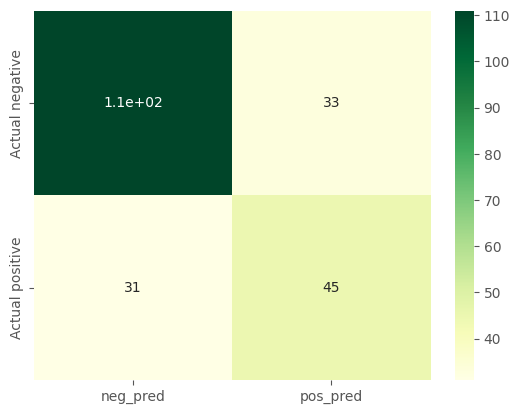

In [50]:
evaluate_classification_model(y_train, y_test, y_pred_train_optuna_2, y_pred_test_optuna_2)

True [1] precision and recall for test data is not good.

## <a id='4.5'>4.5 XGBoost</a>

In [135]:
import xgboost as xgb

In [136]:
# Creating an XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42, scale_pos_weight=1)

# Fitting the model
xgb_model.fit(X_train_, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [137]:
y_pred_train = xgb_model.predict(X_train_)
y_pred_test = xgb_model.predict(X_test_)

Accuracy on train set: 1.0
Accuracy on test set: 0.68
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       385
           1       1.00      1.00      1.00       201

    accuracy                           1.00       586
   macro avg       1.00      1.00      1.00       586
weighted avg       1.00      1.00      1.00       586

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

           0       0.74      0.79      0.76        96
           1       0.55      0.47      0.51        51

    accuracy                           0.68       147
   macro avg       0.64      0.63      0.63       147
weighted avg       0.67      0.68      0.67       147

---------------------------------------------------------------------

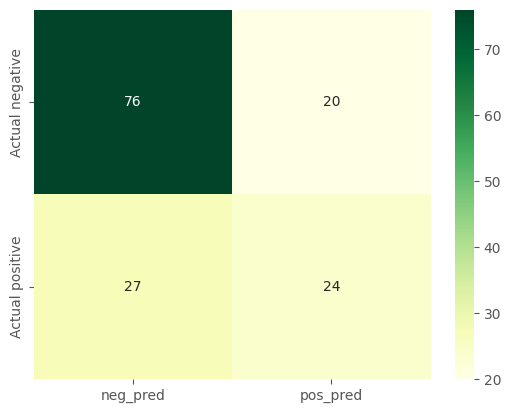

In [138]:
evaluate_classification_model(y_train, y_test, y_pred_train, y_pred_test)

In [139]:

y_pred_train_prob = xgb_model.predict_proba(X_train_)[:, 1]  


y_pred_test_prob = xgb_model.predict_proba(X_test_)[:, 1]

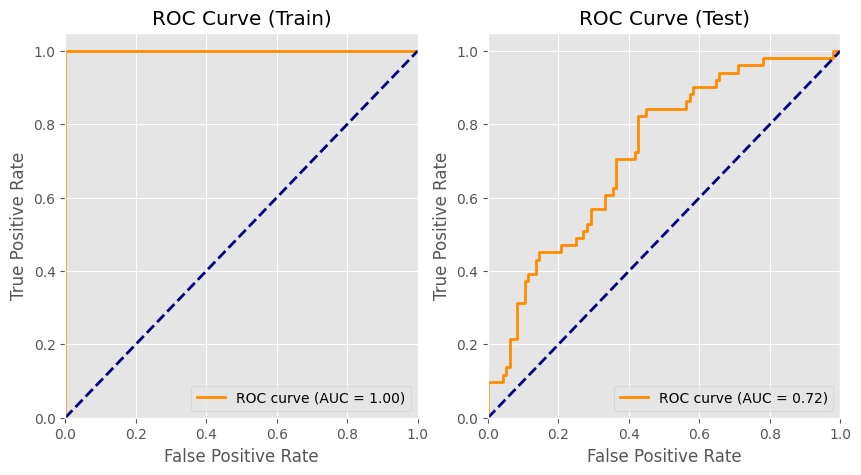

In [140]:
evaluate_classification_model_with_roc(y_train, y_test, y_pred_train_prob, y_pred_test_prob)

Severe overfitting, hyperparameters must be changed:

In [141]:
xgb_model = xgb.XGBClassifier(
    random_state=42,
    scale_pos_weight=1,
    max_depth=3,  # Reduce tree depth
    min_child_weight=4,  # Increase min_child_weight
    gamma=13,  # Increase gamma
    subsample=0.4,  # Reduce subsample
    colsample_bytree=0.4  # Reduce colsample_bytree
)


In [142]:
# Fitting the model
xgb_model.fit(X_train_, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=13, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [143]:
y_pred_train = xgb_model.predict(X_train_)
y_pred_test = xgb_model.predict(X_test_)

Accuracy on train set: 0.8
Accuracy on test set: 0.76
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       385
           1       0.74      0.63      0.68       201

    accuracy                           0.80       586
   macro avg       0.78      0.76      0.77       586
weighted avg       0.79      0.80      0.79       586

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

           0       0.76      0.92      0.83        96
           1       0.74      0.45      0.56        51

    accuracy                           0.76       147
   macro avg       0.75      0.68      0.70       147
weighted avg       0.75      0.76      0.74       147

---------------------------------------------------------------------

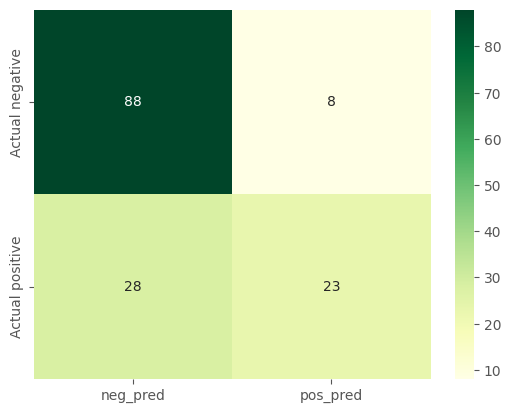

In [144]:
evaluate_classification_model(y_train, y_test, y_pred_train, y_pred_test)

Less overfitting and good accuracy, but unfortunately again the issue of poor [1] recall, especially with test data

## <a id='4.6'>4.6 Decision Trees</a>

In [145]:
from sklearn.tree import DecisionTreeClassifier

In [189]:
 # Creating the classifier object
clf_gini = DecisionTreeClassifier(
            criterion = "gini", 
            max_depth = 6) 
# Performing training 
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [190]:
y_pred_train = clf_gini.predict(X_train) 
y_pred_test = clf_gini.predict(X_test) 

Accuracy on train set: 0.86
Accuracy on test set: 0.72
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       385
           1       0.87      0.69      0.77       201

    accuracy                           0.86       586
   macro avg       0.86      0.82      0.83       586
weighted avg       0.86      0.86      0.85       586

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

           0       0.74      0.90      0.81        96
           1       0.67      0.39      0.49        51

    accuracy                           0.72       147
   macro avg       0.70      0.64      0.65       147
weighted avg       0.71      0.72      0.70       147

--------------------------------------------------------------------

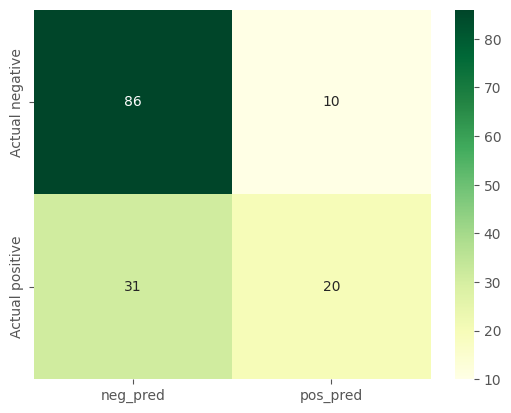

In [191]:
evaluate_classification_model(y_train, y_test, y_pred_train, y_pred_test)

Not good, overfitting and really poor [1] recall value for the test data

GridSearchCV:

In [192]:

# Creating the classifier object
clf = DecisionTreeClassifier()

# Define an extensive hyperparameter grid for the grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'random_state': [42]  
}

# Instantiate GridSearchCV with the classifier and parameter grid
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='recall')  # Set scoring to 'recall'

# Perform the grid search on your training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Recall Score: ", grid_search.best_score_)


Best Parameters:  {'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'best'}
Best Recall Score:  0.6514634146341463


In [193]:
best_model = grid_search.best_estimator_

In [194]:

y_pred_train = best_model.predict(X_train) 

y_pred_test= best_model.predict(X_test)

Accuracy on train set: 0.77
Accuracy on test set: 0.67
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81       385
           1       0.63      0.84      0.72       201

    accuracy                           0.77       586
   macro avg       0.76      0.79      0.76       586
weighted avg       0.81      0.77      0.78       586

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

           0       0.82      0.65      0.72        96
           1       0.52      0.73      0.61        51

    accuracy                           0.67       147
   macro avg       0.67      0.69      0.66       147
weighted avg       0.71      0.67      0.68       147

--------------------------------------------------------------------

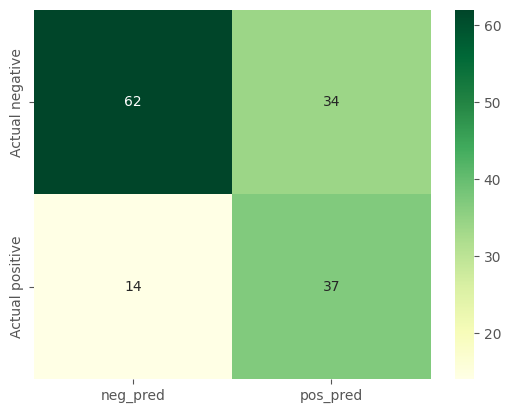

In [195]:
evaluate_classification_model(y_train, y_test, y_pred_train, y_pred_test)

RandomizedSearchCV:

In [197]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [202]:
# Creating the classifier object
clf = DecisionTreeClassifier()

# Define the parameter distributions for RandomizedSearchCV
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None] + list(range(1, 21)),  # Range of values for max_depth
    'min_samples_split': randint(2, 11),  # Range of values for min_samples_split
    'min_samples_leaf': randint(1, 5),  # Range of values for min_samples_leaf
    'max_features': ['auto', 'sqrt', 'log2', None],
    'random_state': [42]
}

# Instantiate RandomizedSearchCV with the classifier and parameter distributions
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=100, cv=5, scoring='f1', random_state=42)  # Set scoring to 'recall'

# Perform the randomized search on your training data
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", random_search.best_params_)
print("Best F1 Score: ", random_search.best_score_)

Best Parameters:  {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 4, 'random_state': 42, 'splitter': 'best'}
Best F1 Score:  0.651969901319236


In [199]:
best_model = random_search.best_estimator_

In [200]:

y_pred_train = best_model.predict(X_train) 

y_pred_test= best_model.predict(X_test)

Accuracy on train set: 0.84
Accuracy on test set: 0.7
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       385
           1       0.83      0.68      0.75       201

    accuracy                           0.84       586
   macro avg       0.84      0.80      0.82       586
weighted avg       0.84      0.84      0.84       586

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

           0       0.72      0.89      0.79        96
           1       0.62      0.35      0.45        51

    accuracy                           0.70       147
   macro avg       0.67      0.62      0.62       147
weighted avg       0.69      0.70      0.67       147

---------------------------------------------------------------------

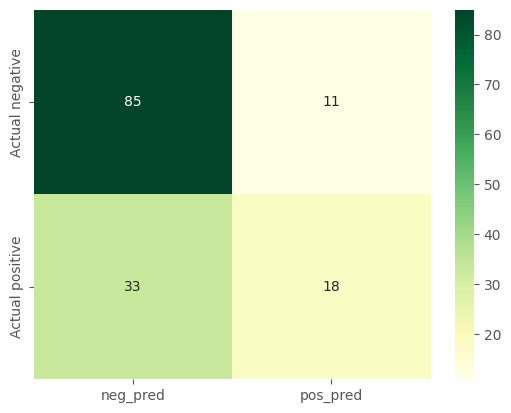

In [201]:
evaluate_classification_model(y_train, y_test, y_pred_train, y_pred_test)

Overfitting and quite poor [1] recall for test data

With Optuna:

In [147]:
def objective_dect(trial):
    
    # Define hyperparameters
    param_dect = {'max_depth' : trial.suggest_int("max_depth", 2, 64),
                  'ccp_alpha' :trial.suggest_float('ccp_alpha',0.001, 10.0, log=True),
                  'max_features': trial.suggest_categorical('max_features',['auto', 'sqrt', 'log2']),
                  'min_samples_split' : trial.suggest_int("min_samples_split", 2, 30),
                  'min_samples_leaf' : trial.suggest_int("min_samples_leaf", 1, 30),
                  'criterion' : trial.suggest_categorical("criterion", ["gini", "entropy"])}

    # Create and train the model
    dect = DecisionTreeClassifier(**param_dect,random_state=42)
    dect.fit(X_train, y_train)

    # Evaluate the model
    score = cross_val_score(dect, X_train, y_train, cv=cv, scoring="accuracy").mean()

    return score

In [148]:
study_dect = optuna.create_study(direction='maximize',study_name = "Dect")
study_dect.optimize(objective_dect, n_trials=300)

[I 2023-10-27 23:57:31,655] A new study created in memory with name: Dect
[I 2023-10-27 23:57:32,116] Trial 0 finished with value: 0.7242197545295148 and parameters: {'max_depth': 60, 'ccp_alpha': 0.004333413945404391, 'max_features': 'sqrt', 'min_samples_split': 19, 'min_samples_leaf': 26, 'criterion': 'gini'}. Best is trial 0 with value: 0.7242197545295148.
[I 2023-10-27 23:57:32,539] Trial 1 finished with value: 0.7361952074810053 and parameters: {'max_depth': 42, 'ccp_alpha': 0.00151546496307088, 'max_features': 'auto', 'min_samples_split': 13, 'min_samples_leaf': 9, 'criterion': 'gini'}. Best is trial 1 with value: 0.7361952074810053.
[I 2023-10-27 23:57:32,959] Trial 2 finished with value: 0.6996259497369958 and parameters: {'max_depth': 13, 'ccp_alpha': 0.011120103232728083, 'max_features': 'sqrt', 'min_samples_split': 17, 'min_samples_leaf': 5, 'criterion': 'gini'}. Best is trial 1 with value: 0.7361952074810053.
[I 2023-10-27 23:57:33,292] Trial 3 finished with value: 0.718100

In [149]:
# Evaluating our Optuna Trial
print("Best trial:", study_dect.best_trial.number)
print("Best accuracy:", study_dect.best_trial.value)
print("Best hyperparameters:", study_dect.best_params)

Best trial: 84
Best accuracy: 0.7546054938632377
Best hyperparameters: {'max_depth': 14, 'ccp_alpha': 0.0012219561665179459, 'max_features': 'sqrt', 'min_samples_split': 13, 'min_samples_leaf': 27, 'criterion': 'entropy'}


In [150]:
best_param_dect = study_dect.best_params
DecT = DecisionTreeClassifier(**best_param_dect,random_state=42).fit(X_train,y_train)
y_pred_train_optuna = DecT.predict(X_train)
y_pred_test_optuna = DecT.predict(X_test)

Accuracy on train set: 0.78
Accuracy on test set: 0.71
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       385
           1       0.69      0.66      0.68       201

    accuracy                           0.78       586
   macro avg       0.76      0.75      0.76       586
weighted avg       0.78      0.78      0.78       586

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

           0       0.75      0.84      0.79        96
           1       0.62      0.47      0.53        51

    accuracy                           0.71       147
   macro avg       0.68      0.66      0.66       147
weighted avg       0.70      0.71      0.70       147

--------------------------------------------------------------------

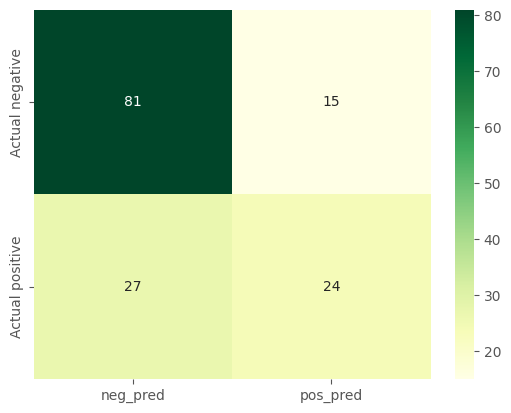

In [151]:
evaluate_classification_model(y_train, y_test, y_pred_train_optuna, y_pred_test_optuna)

In [166]:
def objective_dect_recall(trial):
    
    # Define hyperparameters
    param_dect = {'max_depth' : trial.suggest_int("max_depth", 2, 64),
                  'ccp_alpha' :trial.suggest_float('ccp_alpha',0.001, 10.0, log=True),
                  'max_features': trial.suggest_categorical('max_features',['auto', 'sqrt', 'log2']),
                  'min_samples_split' : trial.suggest_int("min_samples_split", 2, 30),
                  'min_samples_leaf' : trial.suggest_int("min_samples_leaf", 1, 30),
                  'criterion' : trial.suggest_categorical("criterion", ["gini", "entropy"])}

    # Create and train the model
    dect = DecisionTreeClassifier(**param_dect,random_state=42)
    dect.fit(X_train, y_train)

    # Evaluate the model
    score = cross_val_score(dect, X_train, y_train, cv=cv, scoring="recall").mean()

    return score

In [169]:
study_dect_recall = optuna.create_study(direction='maximize',study_name = "Dect_recall")
study_dect_recall.optimize(objective_dect_recall, n_trials=300)

[I 2023-10-28 00:16:24,290] A new study created in memory with name: Dect_recall
[I 2023-10-28 00:16:24,970] Trial 0 finished with value: 0.554798943192731 and parameters: {'max_depth': 9, 'ccp_alpha': 0.02708141820648436, 'max_features': 'sqrt', 'min_samples_split': 24, 'min_samples_leaf': 22, 'criterion': 'gini'}. Best is trial 0 with value: 0.554798943192731.
[I 2023-10-28 00:16:26,115] Trial 1 finished with value: 0.0 and parameters: {'max_depth': 3, 'ccp_alpha': 0.1364877762416542, 'max_features': 'sqrt', 'min_samples_split': 29, 'min_samples_leaf': 22, 'criterion': 'gini'}. Best is trial 0 with value: 0.554798943192731.
[I 2023-10-28 00:16:27,066] Trial 2 finished with value: 0.0 and parameters: {'max_depth': 64, 'ccp_alpha': 8.24020383715557, 'max_features': 'auto', 'min_samples_split': 8, 'min_samples_leaf': 30, 'criterion': 'entropy'}. Best is trial 0 with value: 0.554798943192731.
[I 2023-10-28 00:16:27,592] Trial 3 finished with value: 0.0 and parameters: {'max_depth': 24, '

In [171]:
# Evaluating our Optuna Trial
print("Best trial:", study_dect_recall.best_trial.number)
print("Best recall:", study_dect_recall.best_trial.value)
print("Best hyperparameters:", study_dect_recall.best_params)

Best trial: 68
Best recall: 0.7534412680251353
Best hyperparameters: {'max_depth': 34, 'ccp_alpha': 0.020984784346176726, 'max_features': 'log2', 'min_samples_split': 16, 'min_samples_leaf': 29, 'criterion': 'gini'}


In [172]:
best_param_dect_recall = study_dect_recall.best_params
DecT_recall = DecisionTreeClassifier(**best_param_dect_recall,random_state=42).fit(X_train,y_train)
y_pred_train_optuna_recall = DecT_recall.predict(X_train)
y_pred_test_optuna_recall = DecT_recall.predict(X_test)

Accuracy on train set: 0.72
Accuracy on test set: 0.6
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

           0       0.89      0.64      0.75       385
           1       0.55      0.86      0.67       201

    accuracy                           0.72       586
   macro avg       0.72      0.75      0.71       586
weighted avg       0.78      0.72      0.72       586

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

           0       0.79      0.52      0.63        96
           1       0.45      0.75      0.56        51

    accuracy                           0.60       147
   macro avg       0.62      0.63      0.60       147
weighted avg       0.68      0.60      0.61       147

---------------------------------------------------------------------

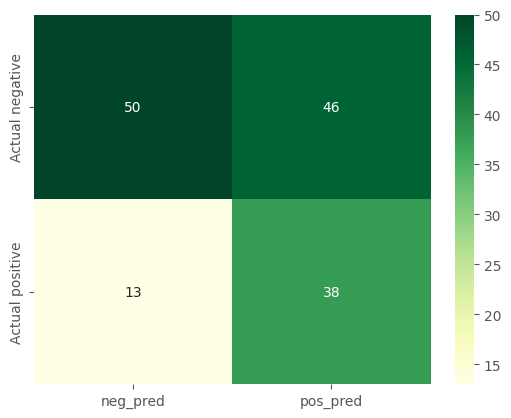

In [173]:
evaluate_classification_model(y_train, y_test, y_pred_train_optuna_recall, y_pred_test_optuna_recall)

## <a id='4.7'>4.7 KNN</a>

In [269]:
from sklearn.neighbors import KNeighborsClassifier

Optuna with scoring = "f1":

In [270]:
def objective_knn(trial):
    
    # Define hyperparameters
    param_knn = {'n_neighbors' : trial.suggest_int('n_neighbors', 1, 100)
    ,'weights' : trial.suggest_categorical('weights', ['uniform', 'distance']),
    'metric' : trial.suggest_categorical('metric', ['euclidean', 'manhattan','minkowski']),
    'p' : trial.suggest_int('p', 1, 50),
    'algorithm' : trial.suggest_categorical('algorithm',['auto','ball_tree', 'kd_tree', 'brute']),
    'leaf_size' : trial.suggest_int('leaf_size', 1, 100)}

    # Create and train the model
    knn = KNeighborsClassifier(**param_knn)
    knn.fit(X_train_, y_train)

    # Evaluate the model
    score = cross_val_score(knn, X_train_, y_train, cv=cv, scoring="f1").mean()

    return score

In [271]:
study_knn = optuna.create_study(direction='maximize',study_name = "KNN")
study_knn.optimize(objective_knn, n_trials=200)

[I 2023-10-28 01:07:51,920] A new study created in memory with name: KNN
[I 2023-10-28 01:07:53,066] Trial 0 finished with value: 0.562653998504588 and parameters: {'n_neighbors': 60, 'weights': 'distance', 'metric': 'euclidean', 'p': 45, 'algorithm': 'brute', 'leaf_size': 41}. Best is trial 0 with value: 0.562653998504588.
[I 2023-10-28 01:07:53,731] Trial 1 finished with value: 0.5195017713867087 and parameters: {'n_neighbors': 96, 'weights': 'uniform', 'metric': 'euclidean', 'p': 28, 'algorithm': 'ball_tree', 'leaf_size': 13}. Best is trial 0 with value: 0.562653998504588.
[I 2023-10-28 01:07:54,123] Trial 2 finished with value: 0.6152403302898373 and parameters: {'n_neighbors': 30, 'weights': 'distance', 'metric': 'euclidean', 'p': 26, 'algorithm': 'auto', 'leaf_size': 87}. Best is trial 2 with value: 0.6152403302898373.
[I 2023-10-28 01:07:54,949] Trial 3 finished with value: 0.564965128972355 and parameters: {'n_neighbors': 65, 'weights': 'distance', 'metric': 'euclidean', 'p': 3

In [272]:
print("Best trial:", study_knn.best_trial.number)
print("Best F1 score:", study_knn.best_trial.value)
print("Best hyperparameters:", study_knn.best_params)

Best trial: 103
Best F1 score: 0.6383862007059696
Best hyperparameters: {'n_neighbors': 9, 'weights': 'uniform', 'metric': 'euclidean', 'p': 25, 'algorithm': 'brute', 'leaf_size': 17}


In [273]:
best_param_knn = study_knn.best_params
KNN = KNeighborsClassifier(**best_param_knn).fit(X_train_,y_train)
y_pred_train_optuna = KNN.predict(X_train_)
y_pred_test_optuna = KNN.predict(X_test_)

Accuracy on train set: 0.82
Accuracy on test set: 0.76
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       385
           1       0.76      0.69      0.72       201

    accuracy                           0.82       586
   macro avg       0.80      0.79      0.79       586
weighted avg       0.81      0.82      0.82       586

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

           0       0.79      0.86      0.83        96
           1       0.69      0.57      0.62        51

    accuracy                           0.76       147
   macro avg       0.74      0.72      0.72       147
weighted avg       0.76      0.76      0.76       147

--------------------------------------------------------------------

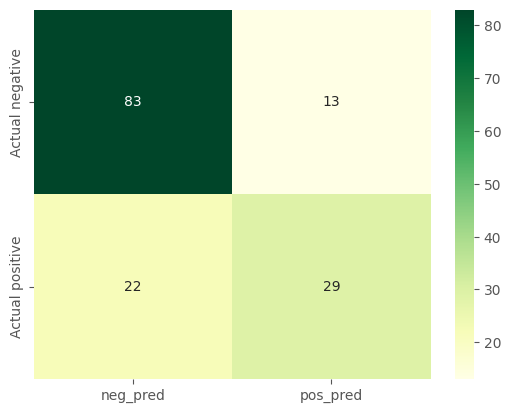

In [274]:
evaluate_classification_model(y_train, y_test, y_pred_train_optuna, y_pred_test_optuna)

Good accuracy, poor [1] recall for test data

With scoring='recall':

In [275]:
def objective_knn(trial):
    
    # Define hyperparameters
    param_knn = {'n_neighbors' : trial.suggest_int('n_neighbors', 1, 100)
    ,'weights' : trial.suggest_categorical('weights', ['uniform', 'distance']),
    'metric' : trial.suggest_categorical('metric', ['euclidean', 'manhattan','minkowski']),
    'p' : trial.suggest_int('p', 1, 50),
    'algorithm' : trial.suggest_categorical('algorithm',['auto','ball_tree', 'kd_tree', 'brute']),
    'leaf_size' : trial.suggest_int('leaf_size', 1, 100)}

    # Create and train the model
    knn = KNeighborsClassifier(**param_knn)
    knn.fit(X_train_, y_train)

    # Evaluate the model
    score = cross_val_score(knn, X_train_, y_train, cv=cv, scoring="recall").mean()

    return score

In [276]:
study_knn = optuna.create_study(direction='maximize',study_name = "KNN")
study_knn.optimize(objective_knn, n_trials=200)

[I 2023-10-28 01:13:20,464] A new study created in memory with name: KNN
[I 2023-10-28 01:13:21,205] Trial 0 finished with value: 0.5195994146436265 and parameters: {'n_neighbors': 24, 'weights': 'uniform', 'metric': 'euclidean', 'p': 33, 'algorithm': 'auto', 'leaf_size': 9}. Best is trial 0 with value: 0.5195994146436265.
[I 2023-10-28 01:13:21,723] Trial 1 finished with value: 0.4143964247221348 and parameters: {'n_neighbors': 74, 'weights': 'distance', 'metric': 'manhattan', 'p': 45, 'algorithm': 'auto', 'leaf_size': 98}. Best is trial 0 with value: 0.5195994146436265.
[I 2023-10-28 01:13:22,381] Trial 2 finished with value: 0.4112071417791164 and parameters: {'n_neighbors': 59, 'weights': 'uniform', 'metric': 'manhattan', 'p': 19, 'algorithm': 'ball_tree', 'leaf_size': 3}. Best is trial 0 with value: 0.5195994146436265.
[I 2023-10-28 01:13:23,478] Trial 3 finished with value: 0.43038607823280045 and parameters: {'n_neighbors': 50, 'weights': 'uniform', 'metric': 'minkowski', 'p': 2

In [277]:
print("Best trial:", study_knn.best_trial.number)
print("Best recall:", study_knn.best_trial.value)
print("Best hyperparameters:", study_knn.best_params)

Best trial: 28
Best recall: 0.6069183910300077
Best hyperparameters: {'n_neighbors': 9, 'weights': 'distance', 'metric': 'euclidean', 'p': 21, 'algorithm': 'ball_tree', 'leaf_size': 26}


In [278]:
best_param_knn = study_knn.best_params
KNN = KNeighborsClassifier(**best_param_knn).fit(X_train_,y_train)
y_pred_train_optuna = KNN.predict(X_train_)
y_pred_test_optuna = KNN.predict(X_test_)

Accuracy on train set: 1.0
Accuracy on test set: 0.76
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       385
           1       1.00      1.00      1.00       201

    accuracy                           1.00       586
   macro avg       1.00      1.00      1.00       586
weighted avg       1.00      1.00      1.00       586

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

           0       0.79      0.86      0.83        96
           1       0.69      0.57      0.62        51

    accuracy                           0.76       147
   macro avg       0.74      0.72      0.72       147
weighted avg       0.76      0.76      0.76       147

---------------------------------------------------------------------

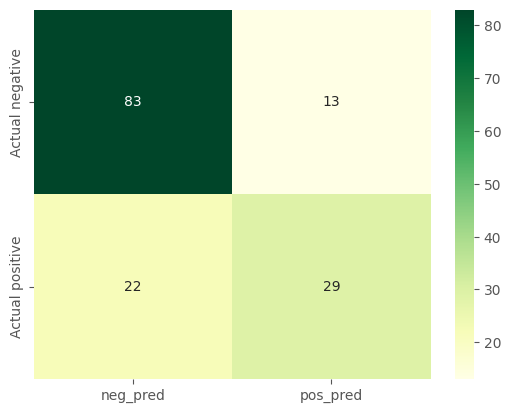

In [279]:
evaluate_classification_model(y_train, y_test, y_pred_train_optuna, y_pred_test_optuna)  

Severe overfitting

## <a id='4.8'>4.8 Neural Networks:</a>

In [39]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

import keras 
from keras.models import Sequential 
from keras.layers import Dense, Activation, Dropout     

In [40]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots
from tensorflow.keras import layers
from tensorflow.keras import regularizers


import pathlib
import shutil
import tempfile

In [41]:
def evaluate_classification_neural_network(y_train, y_test, y_pred_train, y_pred_test):
    # Convert probabilities to binary predictions using the threshold
    threshold=0.5
    y_pred_train_binary = (y_pred_train > threshold).astype(int)
    y_pred_test_binary = (y_pred_test > threshold).astype(int)

    # Print accuracy of our model for train and test set
    print("Accuracy on train set:", round(accuracy_score(y_train, y_pred_train_binary), 2))
    print("Accuracy on test set:", round(accuracy_score(y_test, y_pred_test_binary), 2))
    print("--------" * 10)

    # Print classification report of our model for train data
    print("Classification for train data:")
    print(classification_report(y_train, y_pred_train_binary))
    print("--------" * 10)

    # Print classification report of our model for test data
    print("Classification for test data:")
    print(classification_report(y_test, y_pred_test_binary))
    print("--------" * 10)

    # Evaluate the model with a confusion matrix
    cm = confusion_matrix(y_test, y_pred_test_binary)

    # Plot smaller heatmap
    heatmap_size=(8, 6)
    fig, ax = plt.subplots(figsize=heatmap_size)
    sns.heatmap(cm, annot=True, cmap='YlGn',
                yticklabels=['Actual negative', 'Actual positive'],
                xticklabels=['Predicted negative', 'Predicted positive'], ax=ax)
    plt.show()

In [42]:


model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='gelu', input_shape=(8,)),  # Input layer
    tf.keras.layers.Dense(16, activation='gelu'),  # Hidden layer
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer (for binary classification)
])

opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0005)
model.compile(
    optimizer=opt,
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall()
    ]
)


In [43]:
training = model.fit(
    X_train_,
    y_train,
    batch_size=128,
    epochs=200,
    validation_split=0.2, 
    verbose=1,
    )

Epoch 1/200
4/4 [==============================] - 3s 257ms/step - loss: 0.7592 - precision: 0.2585 - recall: 0.3786 - val_loss: 0.7682 - val_precision: 0.2500 - val_recall: 0.4167
Epoch 2/200
4/4 [==============================] - 0s 38ms/step - loss: 0.7436 - precision: 0.3062 - recall: 0.4571 - val_loss: 0.7592 - val_precision: 0.2542 - val_recall: 0.4167
Epoch 3/200
4/4 [==============================] - 0s 29ms/step - loss: 0.7468 - precision: 0.2822 - recall: 0.4071 - val_loss: 0.7505 - val_precision: 0.2759 - val_recall: 0.4444
Epoch 4/200
4/4 [==============================] - 0s 38ms/step - loss: 0.7222 - precision: 0.3158 - recall: 0.4286 - val_loss: 0.7422 - val_precision: 0.2857 - val_recall: 0.4444
Epoch 5/200
4/4 [==============================] - 0s 43ms/step - loss: 0.7102 - precision: 0.3387 - recall: 0.4500 - val_loss: 0.7343 - val_precision: 0.2885 - val_recall: 0.4167
Epoch 6/200
4/4 [==============================] - 0s 43ms/step - loss: 0.7040 - precision: 0.3237 

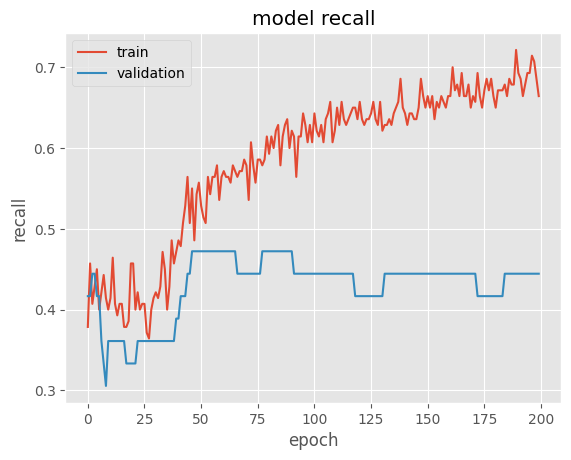

In [44]:
# summarize history for recall
plt.plot(training.history['recall'])
plt.plot(training.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

train and validation curves are quite different, validation values are significantly worse.

In [45]:
y_pred_train = model.predict(X_train_)
y_pred_test = model.predict(X_test_)

7/7 [==============================] - 0s 3ms/step


Accuracy on train set: 0.79
Accuracy on test set: 0.75
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       337
           1       0.72      0.64      0.67       176

    accuracy                           0.79       513
   macro avg       0.77      0.75      0.76       513
weighted avg       0.79      0.79      0.79       513

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       144
           1       0.67      0.57      0.61        76

    accuracy                           0.75       220
   macro avg       0.73      0.71      0.72       220
weighted avg       0.75      0.75      0.75       220

--------------------------------------------------------------------

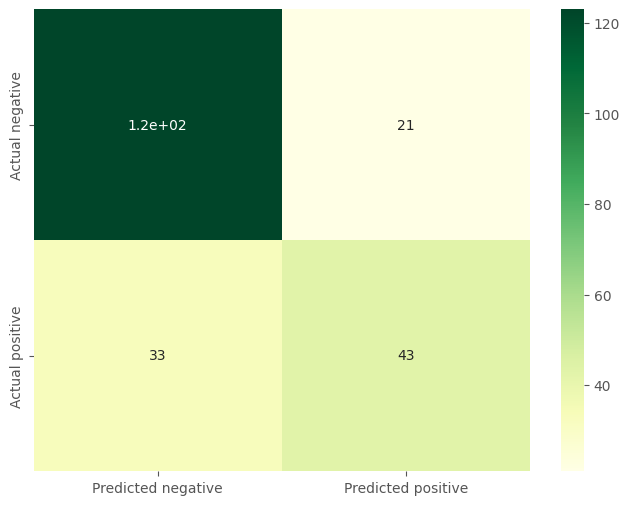

In [46]:
evaluate_classification_neural_network(y_train, y_test, y_pred_train, y_pred_test)

Good accuracy and precision and great negative [0] recall, but unfortunately poor positive [1] recall, especially for the test data.

### Bigger network:

In [66]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(8,)),  # Input layer
    tf.keras.layers.Dense(64, activation='relu'),  # Hidden layer
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer (for binary classification)
])

opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0005)
model.compile(
    optimizer=opt,
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall()
        
    ]
)


In [67]:
training = model.fit(
    X_train_,
    y_train,
    batch_size=128,
    epochs=200,
    validation_split=0.2, 
    verbose=1,
)

Epoch 1/200


4/4 [==============================] - 3s 536ms/step - loss: 0.7457 - precision_3: 0.3398 - recall_3: 0.8786 - val_loss: 0.6945 - val_precision_3: 0.3579 - val_recall_3: 0.9444
Epoch 2/200
4/4 [==============================] - 0s 58ms/step - loss: 0.7127 - precision_3: 0.3628 - recall_3: 0.8214 - val_loss: 0.6702 - val_precision_3: 0.4923 - val_recall_3: 0.8889
Epoch 3/200
4/4 [==============================] - 0s 35ms/step - loss: 0.6901 - precision_3: 0.4348 - recall_3: 0.7143 - val_loss: 0.6487 - val_precision_3: 0.6500 - val_recall_3: 0.7222
Epoch 4/200
4/4 [==============================] - 0s 30ms/step - loss: 0.6570 - precision_3: 0.4920 - recall_3: 0.6571 - val_loss: 0.6297 - val_precision_3: 0.6970 - val_recall_3: 0.6389
Epoch 5/200
4/4 [==============================] - 0s 28ms/step - loss: 0.6293 - precision_3: 0.5734 - recall_3: 0.5857 - val_loss: 0.6122 - val_precision_3: 0.7333 - val_recall_3: 0.6111
Epoch 6/200
4/4 [==============================] - 0s 32ms/step - loss:

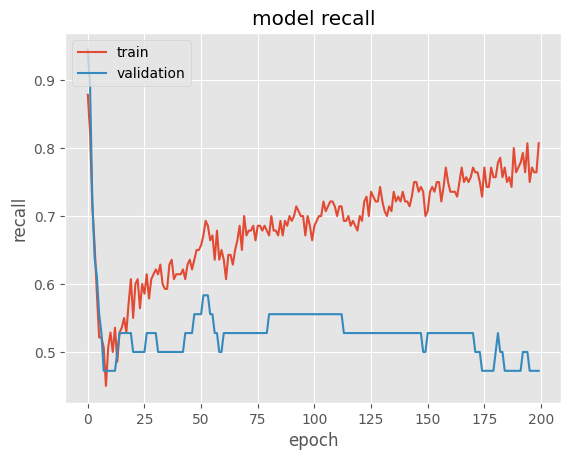

In [69]:
# summarize history for recall
plt.plot(training.history['recall_3'])
plt.plot(training.history['val_recall_3'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Again big difference between train and validation values

In [70]:
y_pred_train = model.predict(X_train_)
y_pred_test = model.predict(X_test_)

 1/17 [>.............................] - ETA: 1s

7/7 [==============================] - 0s 4ms/step


Accuracy on train set: 0.84
Accuracy on test set: 0.74
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       337
           1       0.82      0.69      0.75       176

    accuracy                           0.84       513
   macro avg       0.84      0.81      0.82       513
weighted avg       0.84      0.84      0.84       513

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       144
           1       0.66      0.49      0.56        76

    accuracy                           0.74       220
   macro avg       0.71      0.68      0.69       220
weighted avg       0.73      0.74      0.72       220

--------------------------------------------------------------------

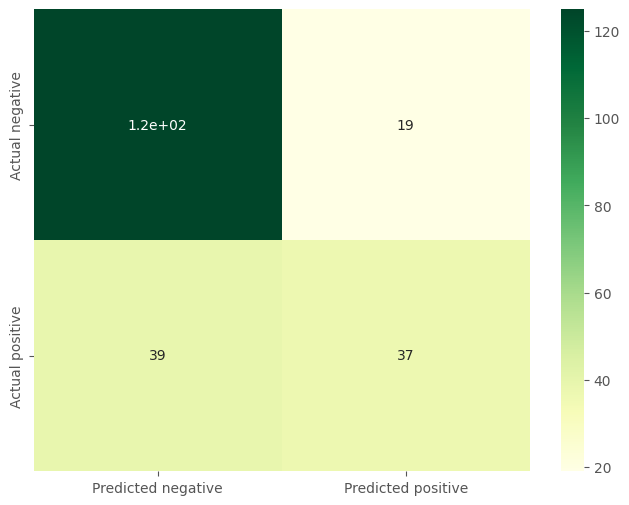

In [71]:
evaluate_classification_neural_network(y_train, y_test, y_pred_train, y_pred_test)

Overfitting and poor positive [1] recall

## <a id='4.9'>4.9 Lightgbm</a>

LightGBM is a gradient boosting framework that uses tree based learning algorithms

In [48]:
import lightgbm as lgbm

In [52]:
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV

In [50]:
import scipy.stats as ss
from scipy import interp
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

In [86]:
# Define and train the LightGBM model
lgb_model = lgbm.LGBMClassifier(class_weight='balanced', random_state=42)
lgb_model.fit(X_train, y_train)

# Predict on the training and test sets
y_pred_train = lgb_model.predict(X_train)
y_pred_test = lgb_model.predict(X_test)

[LightGBM] [Info] Number of positive: 176, number of negative: 337
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 596
[LightGBM] [Info] Number of data points in the train set: 513, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

Accuracy on train set: 1.0
Accuracy on test set: 0.7
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       337
           1       1.00      1.00      1.00       176

    accuracy                           1.00       513
   macro avg       1.00      1.00      1.00       513
weighted avg       1.00      1.00      1.00       513

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       144
           1       0.58      0.54      0.56        76

    accuracy                           0.70       220
   macro avg       0.67      0.67      0.67       220
weighted avg       0.70      0.70      0.70       220

----------------------------------------------------------------------

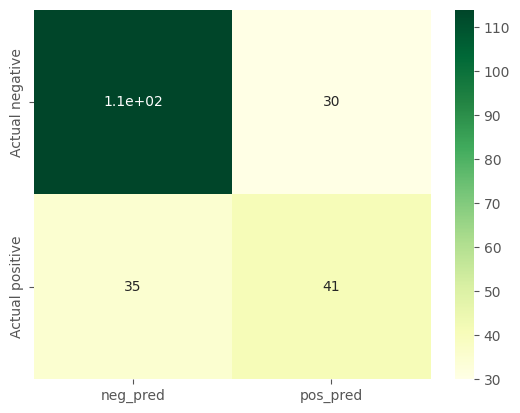

In [87]:
evaluate_classification_model(y_train, y_test, y_pred_train, y_pred_test)

Severe overfitting, optimizing hyperparameter with RandomizedSearchCV and scoring = "f1":

In [92]:
# Define the parameter grid
param_dist = {
    'num_leaves': sp_randint(6, 50),
    'min_child_samples': sp_randint(100, 500),
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 0.1, 0.5, 1.0],
}

# Create the LightGBM classifier
lgb_model = lgbm.LGBMClassifier(class_weight='balanced', random_state=42)

# Perform RandomizedSearchCV
rand_cv = RandomizedSearchCV(estimator=lgb_model, param_distributions=param_dist, n_iter=50,
                             cv=5, scoring='f1', random_state=42, n_jobs=-1)

# Fit the model
rand_cv.fit(X_train, y_train)

# Get the best parameters
best_params = rand_cv.best_params_
print("Best parameters:", best_params)

# Train the model with the best parameters
best_lgb_model = lgbm.LGBMClassifier(class_weight='balanced', random_state=42, **best_params)
best_lgb_model.fit(X_train, y_train)

# Make predictions
y_pred_train = best_lgb_model.predict(X_train)
y_pred_test = best_lgb_model.predict(X_test)

[LightGBM] [Info] Number of positive: 176, number of negative: 337
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000140 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 596
[LightGBM] [Info] Number of data points in the train set: 513, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

Accuracy on train set: 0.82
Accuracy on test set: 0.74
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

           0       0.91      0.81      0.85       337
           1       0.69      0.84      0.76       176

    accuracy                           0.82       513
   macro avg       0.80      0.82      0.81       513
weighted avg       0.83      0.82      0.82       513

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       144
           1       0.62      0.63      0.62        76

    accuracy                           0.74       220
   macro avg       0.71      0.71      0.71       220
weighted avg       0.74      0.74      0.74       220

--------------------------------------------------------------------

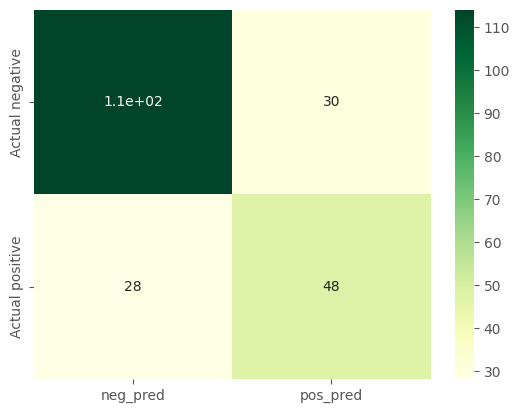

In [93]:
evaluate_classification_model(y_train, y_test, y_pred_train, y_pred_test)

Overfitting, another RandomizedSearchCV run with more parameters:

In [96]:
# Define the parameter grid
param_dist = {'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4],
              'n_estimators' : [100, 200, 300, 400, 500, 600, 800, 1000, 1500, 2000],
              'num_leaves': sp_randint(6, 50), 
              'min_child_samples': sp_randint(100, 500), 
              'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
              'subsample': sp_uniform(loc=0.2, scale=0.8), 
              'max_depth': [-1, 1, 2, 3, 4, 5, 6, 7],
              'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
              'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
              'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

# Create the LightGBM classifier
lgb_model = lgbm.LGBMClassifier(class_weight='balanced', random_state=42)

# Perform RandomizedSearchCV
rand_cv = RandomizedSearchCV(estimator=lgb_model, param_distributions=param_dist, n_iter=200,
                             cv=5, scoring='f1', random_state=42, n_jobs=-1)

# Fit the model
rand_cv.fit(X_train, y_train)

# Get the best parameters
best_params = rand_cv.best_params_
print("Best parameters:", best_params)

# Train the model with the best parameters
best_lgb_model = lgbm.LGBMClassifier(class_weight='balanced', random_state=42, **best_params)
best_lgb_model.fit(X_train, y_train)

# Make predictions
y_pred_train = best_lgb_model.predict(X_train)
y_pred_test = best_lgb_model.predict(X_test)

[LightGBM] [Info] Number of positive: 176, number of negative: 337
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 596
[LightGBM] [Info] Number of data points in the train set: 513, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

Accuracy on train set: 0.79
Accuracy on test set: 0.75
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       337
           1       0.67      0.80      0.73       176

    accuracy                           0.79       513
   macro avg       0.77      0.79      0.78       513
weighted avg       0.81      0.79      0.80       513

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       144
           1       0.62      0.66      0.64        76

    accuracy                           0.75       220
   macro avg       0.72      0.72      0.72       220
weighted avg       0.75      0.75      0.75       220

--------------------------------------------------------------------

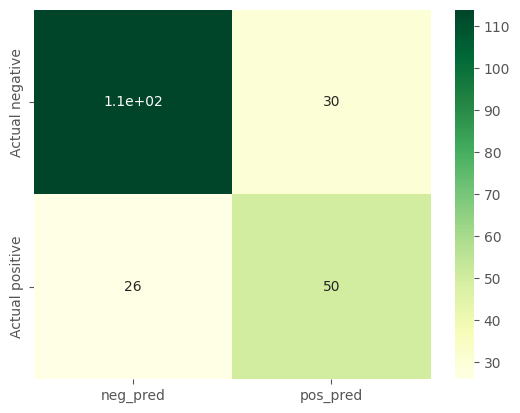

In [97]:
evaluate_classification_model(y_train, y_test, y_pred_train, y_pred_test)

Not bad, but true [1] recall value can still be improved.

With scoring = 'recall':

In [98]:
# Define the parameter grid
param_dist = {'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4],
              'n_estimators' : [100, 200, 300, 400, 500, 600, 800, 1000, 1500, 2000],
              'num_leaves': sp_randint(6, 50), 
              'min_child_samples': sp_randint(100, 500), 
              'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
              'subsample': sp_uniform(loc=0.2, scale=0.8), 
              'max_depth': [-1, 1, 2, 3, 4, 5, 6, 7],
              'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
              'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
              'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

# Create the LightGBM classifier
lgb_model = lgbm.LGBMClassifier(class_weight='balanced', random_state=42)

# Perform RandomizedSearchCV
rand_cv = RandomizedSearchCV(estimator=lgb_model, param_distributions=param_dist, n_iter=200,
                             cv=5, scoring='recall', random_state=42, n_jobs=-1)

# Fit the model
rand_cv.fit(X_train, y_train)

# Get the best parameters
best_params = rand_cv.best_params_
print("Best parameters:", best_params)

# Train the model with the best parameters
best_lgb_model = lgbm.LGBMClassifier(class_weight='balanced', random_state=42, **best_params)
best_lgb_model.fit(X_train, y_train)

# Make predictions
y_pred_train = best_lgb_model.predict(X_train)
y_pred_test = best_lgb_model.predict(X_test)

[LightGBM] [Info] Number of positive: 176, number of negative: 337
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 596
[LightGBM] [Info] Number of data points in the train set: 513, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

Accuracy on train set: 0.82
Accuracy on test set: 0.74
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

           0       0.91      0.81      0.85       337
           1       0.69      0.84      0.76       176

    accuracy                           0.82       513
   macro avg       0.80      0.82      0.81       513
weighted avg       0.83      0.82      0.82       513

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       144
           1       0.61      0.66      0.63        76

    accuracy                           0.74       220
   macro avg       0.71      0.72      0.71       220
weighted avg       0.74      0.74      0.74       220

--------------------------------------------------------------------

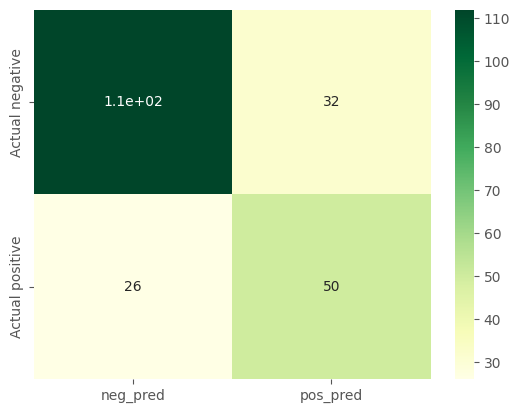

In [99]:
evaluate_classification_model(y_train, y_test, y_pred_train, y_pred_test)

Overfitting and no improvement of positive [1] recall

# <a id='5'>5. Conclusion</a>

The best machine learning model for diabetes classification was the logistic regression model after GridSearchCV optimization with scoring set to 'recall'. Recall was chosen as a more important metric than precision, since it is important to detect the actual cases of diabetes.
The logistic regression model after GridSearchCV optimization specifically for recall demonstrated the best [1] recall value with a good overall accuracy.

The best model and its results:

In [125]:
best_model_logreg_recall 

LogisticRegression(C=0.001, class_weight='balanced', random_state=42,
                   solver='liblinear')

In [131]:
# Saving the model:
joblib.dump(best_model_logreg_recall, 'best_model_logreg_recall.pkl')


['best_model_logreg_recall.pkl']

In [126]:
y_pred_train = best_model_logreg_recall.predict(X_train_) 
y_pred_test = best_model_logreg_recall.predict(X_test_)

Accuracy on train set: 0.75
Accuracy on test set: 0.7
--------------------------------------------------------------------------------
Classification for train data:
              precision    recall  f1-score   support

           0       0.88      0.72      0.79       337
           1       0.60      0.81      0.69       176

    accuracy                           0.75       513
   macro avg       0.74      0.77      0.74       513
weighted avg       0.78      0.75      0.76       513

--------------------------------------------------------------------------------
Classification for test data:
              precision    recall  f1-score   support

           0       0.83      0.67      0.74       144
           1       0.54      0.74      0.63        76

    accuracy                           0.70       220
   macro avg       0.69      0.71      0.68       220
weighted avg       0.73      0.70      0.70       220

---------------------------------------------------------------------

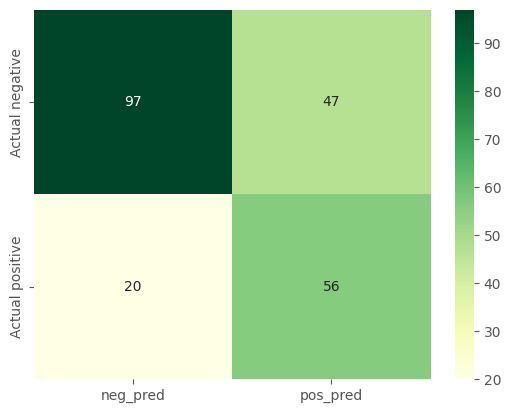

In [127]:
evaluate_classification_model(y_train, y_test, y_pred_train, y_pred_test)

In [128]:
# For the training set
y_pred_train_prob = best_model_logreg_recall.predict_proba(X_train_)[:, 1]  

# For the testing set 
y_pred_test_prob = best_model_logreg_recall.predict_proba(X_test_)[:, 1] 

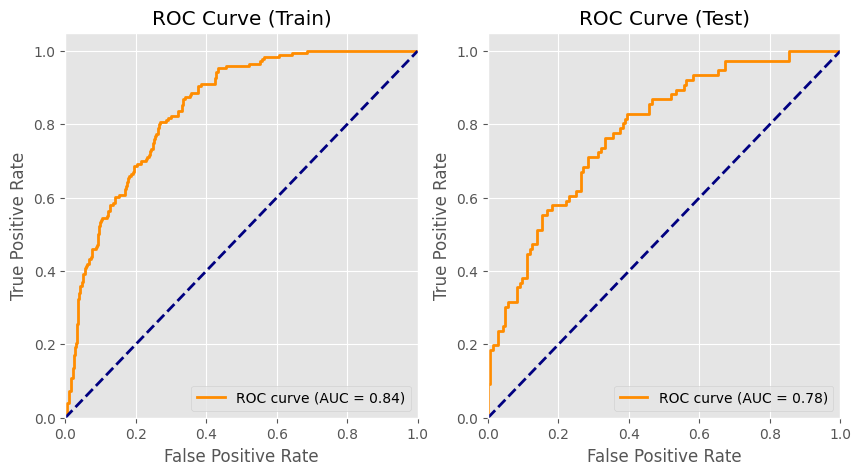

In [129]:
evaluate_classification_model_with_roc(y_train, y_test, y_pred_train_prob, y_pred_test_prob) 